# NBA Shot Log EDA 
### Virginia Baskin and Harry Golen

# Table of Content:

* Data Exploration 

* Data Cleaning

* Visualizations & Correlations

* Feature Engineering

* Feature Selection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
#import dataset
df = pd.read_csv('shot_logs.csv')
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


### General Exploration / Learning the dset / Cleaning

(Virginia)

In [3]:
# Print the high-level information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

Only column with null/missing values is "shot_clock". However, we will explore generating missingness in this dataset later to evaluate the benefits/disadvantages of different methods of data imputation. 

In [4]:
# Make all column names lowercase (easier to type)
df.columns = df.columns.str.lower()

In [5]:
df.sample(10)

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,...,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id
60775,21400069,"NOV 06, 2014 - SAS @ HOU",A,L,-17,1,1,11:29,10.8,13,...,11.7,2,missed,"Canaan, Isaiah",203477,1.7,0,0,tony parker,2225
55235,21400086,"NOV 08, 2014 - BOS @ CHI",A,W,5,10,4,2:50,NaN,0,...,6.2,2,missed,"Hinrich, Kirk",2550,1.3,0,0,jared sullinger,203096
5404,21400080,"NOV 07, 2014 - UTA vs. DAL",H,L,-23,3,2,8:24,11.6,6,...,22.7,2,missed,"Aminu, Al-Farouq",202329,5.8,0,0,gordon hayward,202330
117106,21400729,"FEB 03, 2015 - POR vs. UTA",H,W,1,6,1,2:29,7.8,2,...,17.7,2,made,"Favors, Derrick",202324,5.0,1,2,lamarcus aldridge,200746
12770,21400562,"JAN 11, 2015 - LAL vs. POR",H,L,-12,11,4,9:17,1.3,1,...,24.3,3,missed,"Matthews, Wesley",202083,6.7,0,0,nick young,201156
30574,21400001,"OCT 28, 2014 - NOP vs. ORL",H,W,17,6,2,7:18,7.2,1,...,4.7,2,missed,"O'Quinn, Kyle",203124,1.4,0,0,anthony davis,203076
35593,21400874,"FEB 28, 2015 - DAL vs. BKN",H,L,-10,5,1,4:17,4.0,1,...,4.8,2,missed,"Brown, Markel",203900,1.0,0,0,mnta ellis,101145
112287,21400845,"FEB 25, 2015 - CHI vs. CHA",H,L,-12,4,2,8:35,13.0,0,...,4.3,2,missed,"Kidd-Gilchrist, Michael",203077,0.3,0,0,taj gibson,201959
56263,21400331,"DEC 12, 2014 - BOS vs. NYK",H,L,-6,6,3,3:45,11.4,0,...,5.0,2,made,"Smith, Jason",201160,4.4,1,2,kelly olynyk,203482
66683,21400830,"FEB 23, 2015 - MIA vs. PHI",H,W,11,13,3,0:50,8.9,0,...,23.8,3,made,"Frazier, Tim",204025,6.8,1,3,goran dragic,201609


### Columns: 

**game_id** - unique identifying key for every game/match up 

**matchup** - infomation about game, including: month day, year and abreviated team names (ex: FEB 26, 2015 - CLE vs. GSW or Jan 17, 2015 - GSW @ HOU). 

**location** - whether game is home or away for the player 

**w** - whether player's team won or lost

**final_margin** - by how much did the player's team win or lose (is the score for the shooting player's team minus the score for his opponent's team at the end of that game.)

**shot_number** - how many shots this player has taken in this game so far

**period** - what period this shot occured during

**game_clock** - the time remaining in that period when shot occured (min:sec) 

**shot_clock** - the time on shot clock when shot occured (in seconds) (0 to 24)

**dribbles** - how many times they dibbled the ball once in possession and before shot

**touch_time** - time player had ball before shot 

**shot_dist** - distance from hoop in feet

**pts_type** - whether the attempted shot was a 2 or 3 pointer (free throws not in this dset) 

**shot_result** - whether the shot was made or missed

**closest_defender** - lastname, firstname of closest defender to the player

**closest_defender_player_id** - unique key identifying closest defender above

**close_def_dist** - distance in feet of how far defender was from player

**fgm** - field goals made  (FGM is 1 if the shot was made (went in the basket). It is 0 otherwise.)

**pts** - points awarded for shot (0, 2, or 3)

**player_name** - firstname lastname(s) of player who took the shot

**player_id** - unique key identifying player who took the shot


In [6]:
df['touch_time'].describe()
#it does not make sense for there to be negative values

count    128069.000000
mean          2.765901
std           3.043682
min        -163.600000
25%           0.900000
50%           1.600000
75%           3.700000
max          24.900000
Name: touch_time, dtype: float64

<AxesSubplot: >

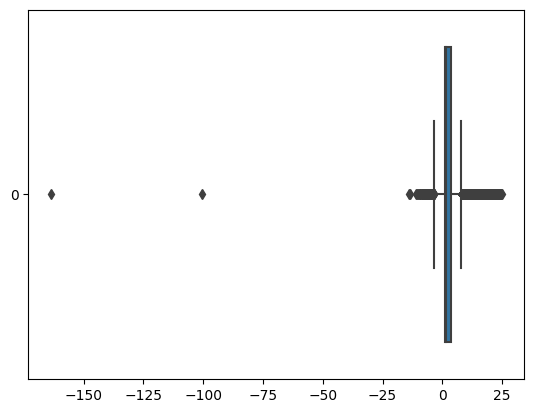

In [7]:
sns.boxplot(df['touch_time'], orient="h")
#definitely anomalies, drop values below zero

In [8]:
zero_outliers = df[(df.touch_time < 0)]
df2 = df.drop(zero_outliers.index)

In [9]:
zero_outliers[['game_id', 'matchup', 'touch_time', 'shot_clock', 'game_clock']]
#312 observations that have negative times 

,game_id,matchup,touch_time,shot_clock,game_clock
748,21400625,"JAN 21, 2015 - CHA vs. MIA",-4.3,9.0,7:55
775,21400459,"DEC 29, 2014 - CHA vs. MIL",-0.4,6.3,7:34
1043,21400195,"NOV 23, 2014 - CHA @ MIA",-2.3,NaN,0:02
1118,21400130,"NOV 14, 2014 - CHA @ PHX",-3.2,17.7,5:36
1260,21400028,"NOV 01, 2014 - CHA vs. MEM",-1.3,23.7,11:00
...,...,...,...,...,...
124820,21400590,"JAN 16, 2015 - BKN @ WAS",-4.2,16.8,9:31
125018,21400266,"DEC 03, 2014 - BKN vs. SAS",-1.2,19.5,8:18
125057,21400116,"NOV 12, 2014 - BKN @ PHX",-8.8,14.3,9:43
125059,21400090,"NOV 09, 2014 - BKN vs. ORL",-0.4,21.6,11:20


In [10]:
len(df) - len(df2) 

312

<AxesSubplot: >

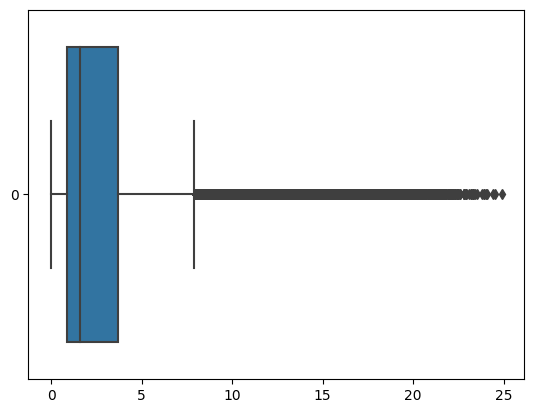

In [11]:
sns.boxplot(df2['touch_time'], orient="h")
#no more negative values, right skewed (as expected)

In [12]:
df2.describe()

,game_id,final_margin,shot_number,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,fgm,pts,player_id
count,1.277570e+05,127757.000000,127757.000000,127757.000000,122203.000000,127757.00000,127757.000000,127757.000000,127757.000000,127757.000000,127757.000000,127757.000000,127757.000000,127757.00000
mean,2.140045e+07,0.209789,6.506368,2.469595,12.450301,2.02828,2.778727,13.576808,2.264964,159043.963399,4.124012,0.452468,0.998082,157229.09032
std,2.578955e+02,13.235094,4.713798,1.139929,5.756509,3.48057,2.987196,8.887801,0.441316,78788.073182,2.756188,0.497738,1.131125,79369.28322
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.00000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.00000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.00000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.00000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.00000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.600000,2.00000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.00000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.00000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.00000


In [13]:
df2.columns

Index(['game_id', 'matchup', 'location', 'w', 'final_margin', 'shot_number',
       'period', 'game_clock', 'shot_clock', 'dribbles', 'touch_time',
       'shot_dist', 'pts_type', 'shot_result', 'closest_defender',
       'closest_defender_player_id', 'close_def_dist', 'fgm', 'pts',
       'player_name', 'player_id'],
      dtype='object')

## Feature Engineering pt. 1 (Cleaning)

Some quick necessary feature engineering to make the dataset easier to work with. (House keeping) (Virginia)

In [14]:
#convert binary variables into numerical binary indicators (0,1)
df2['location'] = np.where(df2['location'] == 'H', 1, 0)
df2['w'] = np.where(df2['w'] == 'W', 1, 0)

In [15]:
#convert game_clock from min:secs to just seconds (to match shot_clock)
df2.game_clock = df2.game_clock.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))

In [16]:
df2.head()

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,...,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1,1,69,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,2,1,14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,3,1,0,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,4,2,707,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,5,2,634,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


## Data Visualization
(Virginia)

### Distributions


Using the updated df (df2), show distributions for continous variables and histograms for categorical values.

Start with continuous:

count    127757.000000
mean          0.209789
std          13.235094
min         -53.000000
25%          -8.000000
50%           1.000000
75%           9.000000
max          53.000000
Name: final_margin, dtype: float64


/var/folders/l5/qtgwn0k57dz6xj57dwh8zwtc0000gn/T/ipykernel_7911/3961046793.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['final_margin'], color='g', bins=100, hist_kws={'alpha': 0.4});


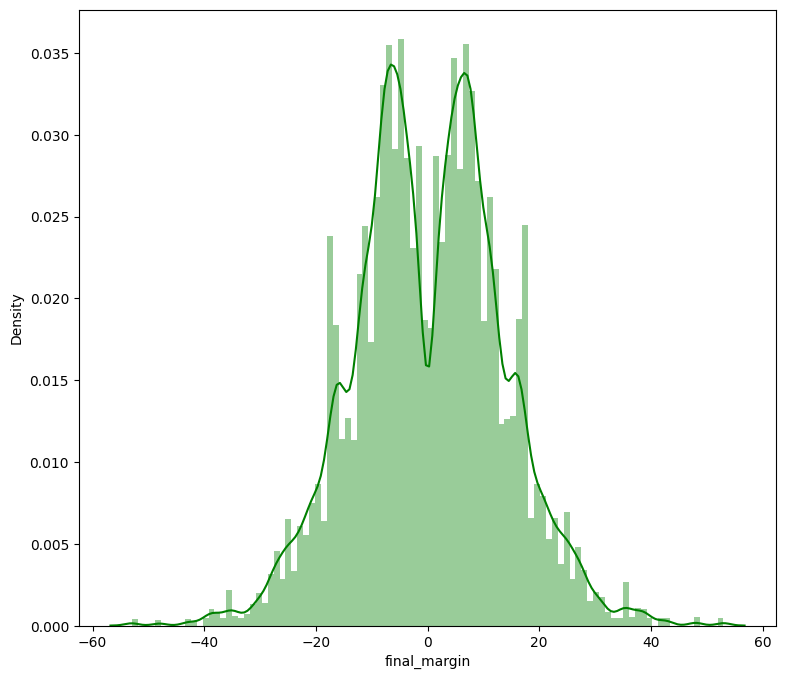

In [17]:
print(df2['final_margin'].describe())
plt.figure(figsize=(9, 8))

sns.distplot(df2['final_margin'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    122203.000000
mean         12.450301
std           5.756509
min           0.000000
25%           8.200000
50%          12.300000
75%          16.600000
max          24.000000
Name: shot_clock, dtype: float64


/var/folders/l5/qtgwn0k57dz6xj57dwh8zwtc0000gn/T/ipykernel_7911/27460455.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['shot_clock'], color='g', bins=100, hist_kws={'alpha': 0.4});


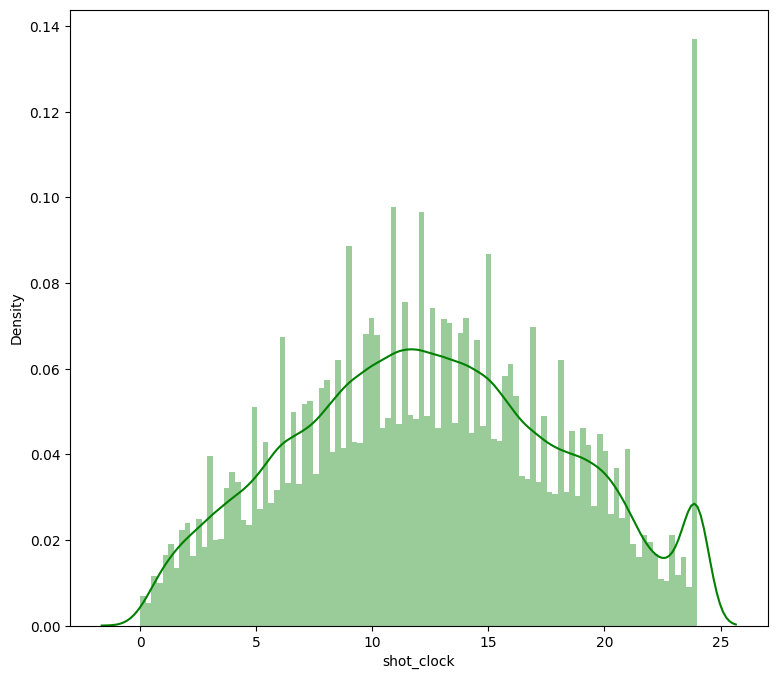

In [18]:
print(df2['shot_clock'].describe())
plt.figure(figsize=(9, 8))

sns.distplot(df2['shot_clock'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [19]:
# Select the numerical featrues
df_num = df2.select_dtypes(include = 'number')
df_num.head()
#ok but some have numerical values but represent categorical levels 
#name_id, period, pts_type, closest_defender_player_id, fgm, pts, player_id

,game_id,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,fgm,pts,player_id
0,21400899,0,1,24,1,1,69,10.8,2,1.9,7.7,2,101187,1.3,1,2,203148
1,21400899,0,1,24,2,1,14,3.4,0,0.8,28.2,3,202711,6.1,0,0,203148
2,21400899,0,1,24,3,1,0,NaN,3,2.7,10.1,2,202711,0.9,0,0,203148
3,21400899,0,1,24,4,2,707,10.3,2,1.9,17.2,2,203900,3.4,0,0,203148
4,21400899,0,1,24,5,2,634,10.9,2,2.7,3.7,2,201152,1.1,0,0,203148


array([[<AxesSubplot: title={'center': 'game_id'}>,
        <AxesSubplot: title={'center': 'location'}>,
        <AxesSubplot: title={'center': 'w'}>,
        <AxesSubplot: title={'center': 'final_margin'}>],
       [<AxesSubplot: title={'center': 'shot_number'}>,
        <AxesSubplot: title={'center': 'period'}>,
        <AxesSubplot: title={'center': 'game_clock'}>,
        <AxesSubplot: title={'center': 'shot_clock'}>],
       [<AxesSubplot: title={'center': 'dribbles'}>,
        <AxesSubplot: title={'center': 'touch_time'}>,
        <AxesSubplot: title={'center': 'shot_dist'}>,
        <AxesSubplot: title={'center': 'pts_type'}>],
       [<AxesSubplot: title={'center': 'closest_defender_player_id'}>,
        <AxesSubplot: title={'center': 'close_def_dist'}>,
        <AxesSubplot: title={'center': 'fgm'}>,
        <AxesSubplot: title={'center': 'pts'}>],
       [<AxesSubplot: title={'center': 'player_id'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

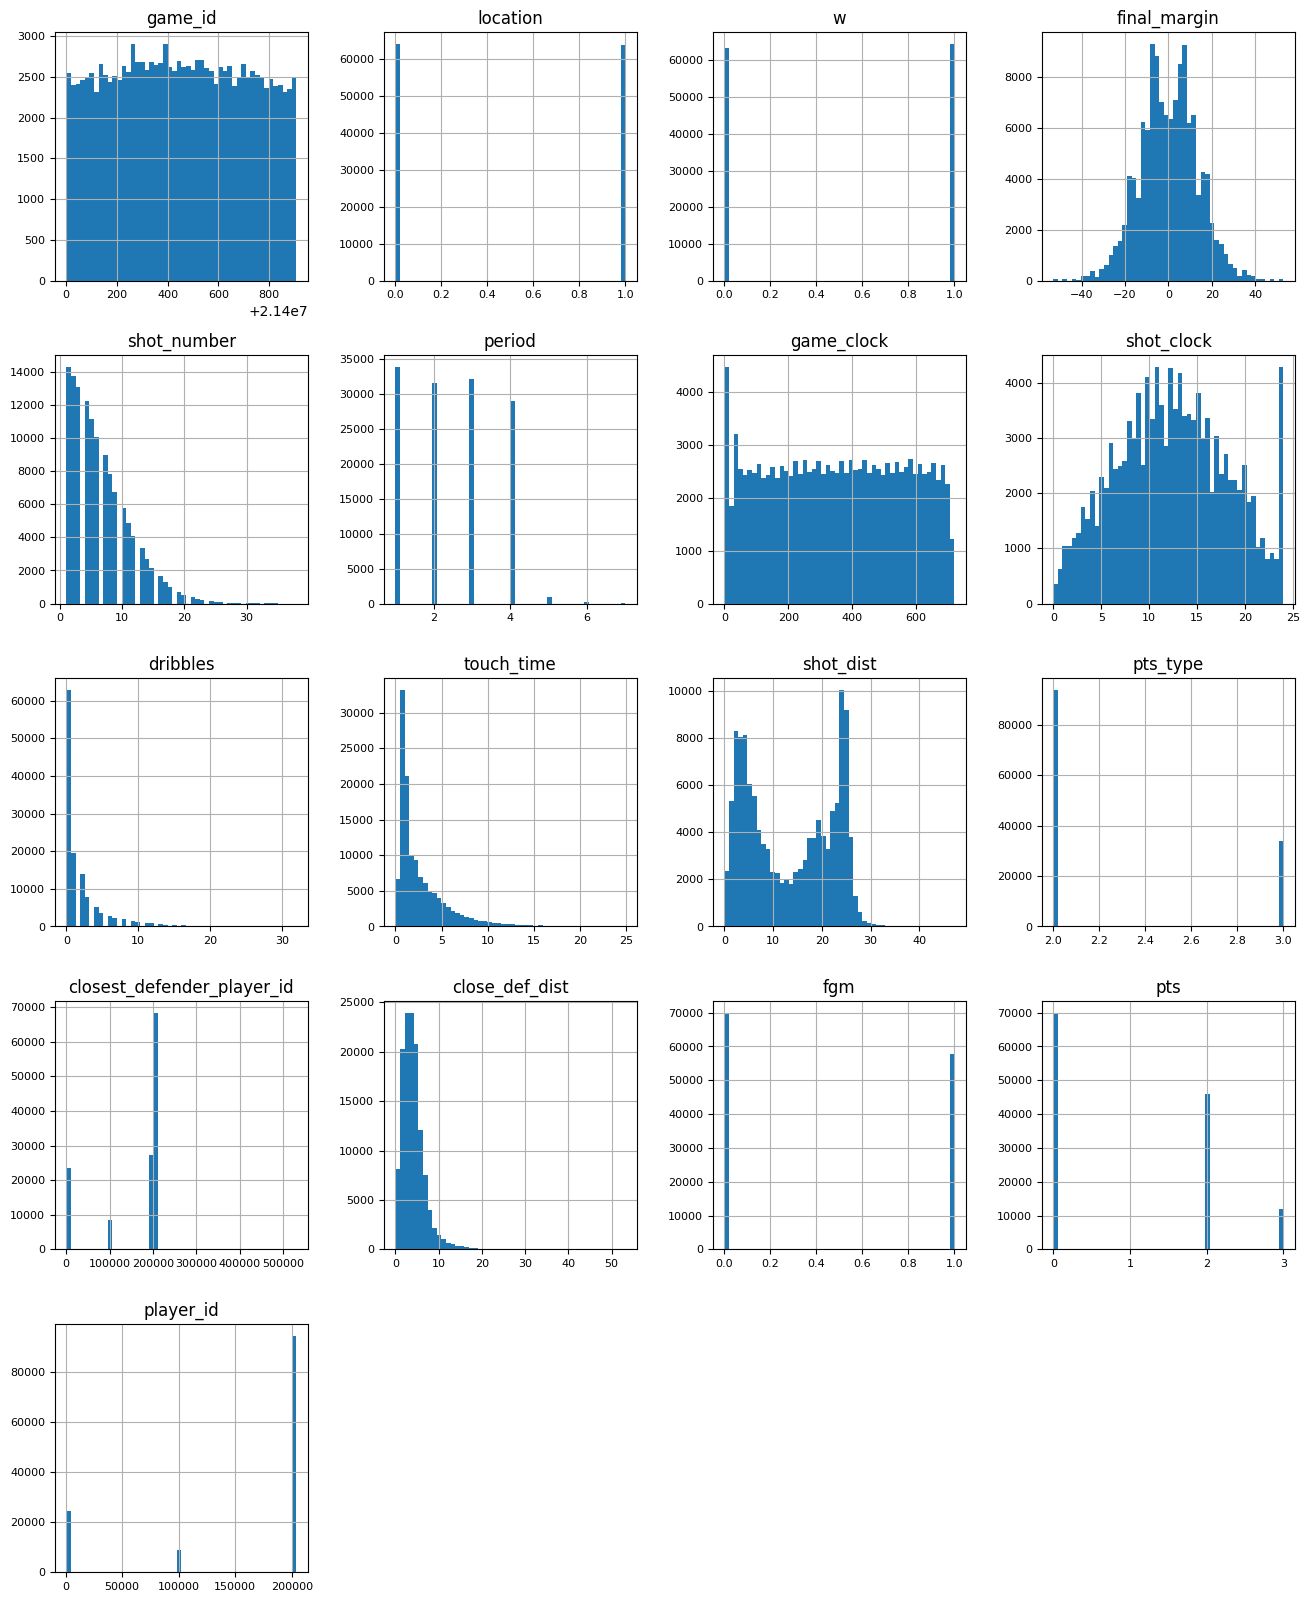

In [20]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

It would be better to hand select the true continuous variables, since a lot of features have numbers but are unique identifiers or categorical variables by nature and do not have a nice or insightful distribution.

In [21]:
#try again
df_con = df2[['final_margin', 'shot_number', 'game_clock', 'shot_clock', 'dribbles', 'touch_time', 'shot_dist', 'close_def_dist']]
df_con.head()

,final_margin,shot_number,game_clock,shot_clock,dribbles,touch_time,shot_dist,close_def_dist
0,24,1,69,10.8,2,1.9,7.7,1.3
1,24,2,14,3.4,0,0.8,28.2,6.1
2,24,3,0,NaN,3,2.7,10.1,0.9
3,24,4,707,10.3,2,1.9,17.2,3.4
4,24,5,634,10.9,2,2.7,3.7,1.1


array([[<AxesSubplot: title={'center': 'final_margin'}>,
        <AxesSubplot: title={'center': 'shot_number'}>,
        <AxesSubplot: title={'center': 'game_clock'}>],
       [<AxesSubplot: title={'center': 'shot_clock'}>,
        <AxesSubplot: title={'center': 'dribbles'}>,
        <AxesSubplot: title={'center': 'touch_time'}>],
       [<AxesSubplot: title={'center': 'shot_dist'}>,
        <AxesSubplot: title={'center': 'close_def_dist'}>,
        <AxesSubplot: >]], dtype=object)

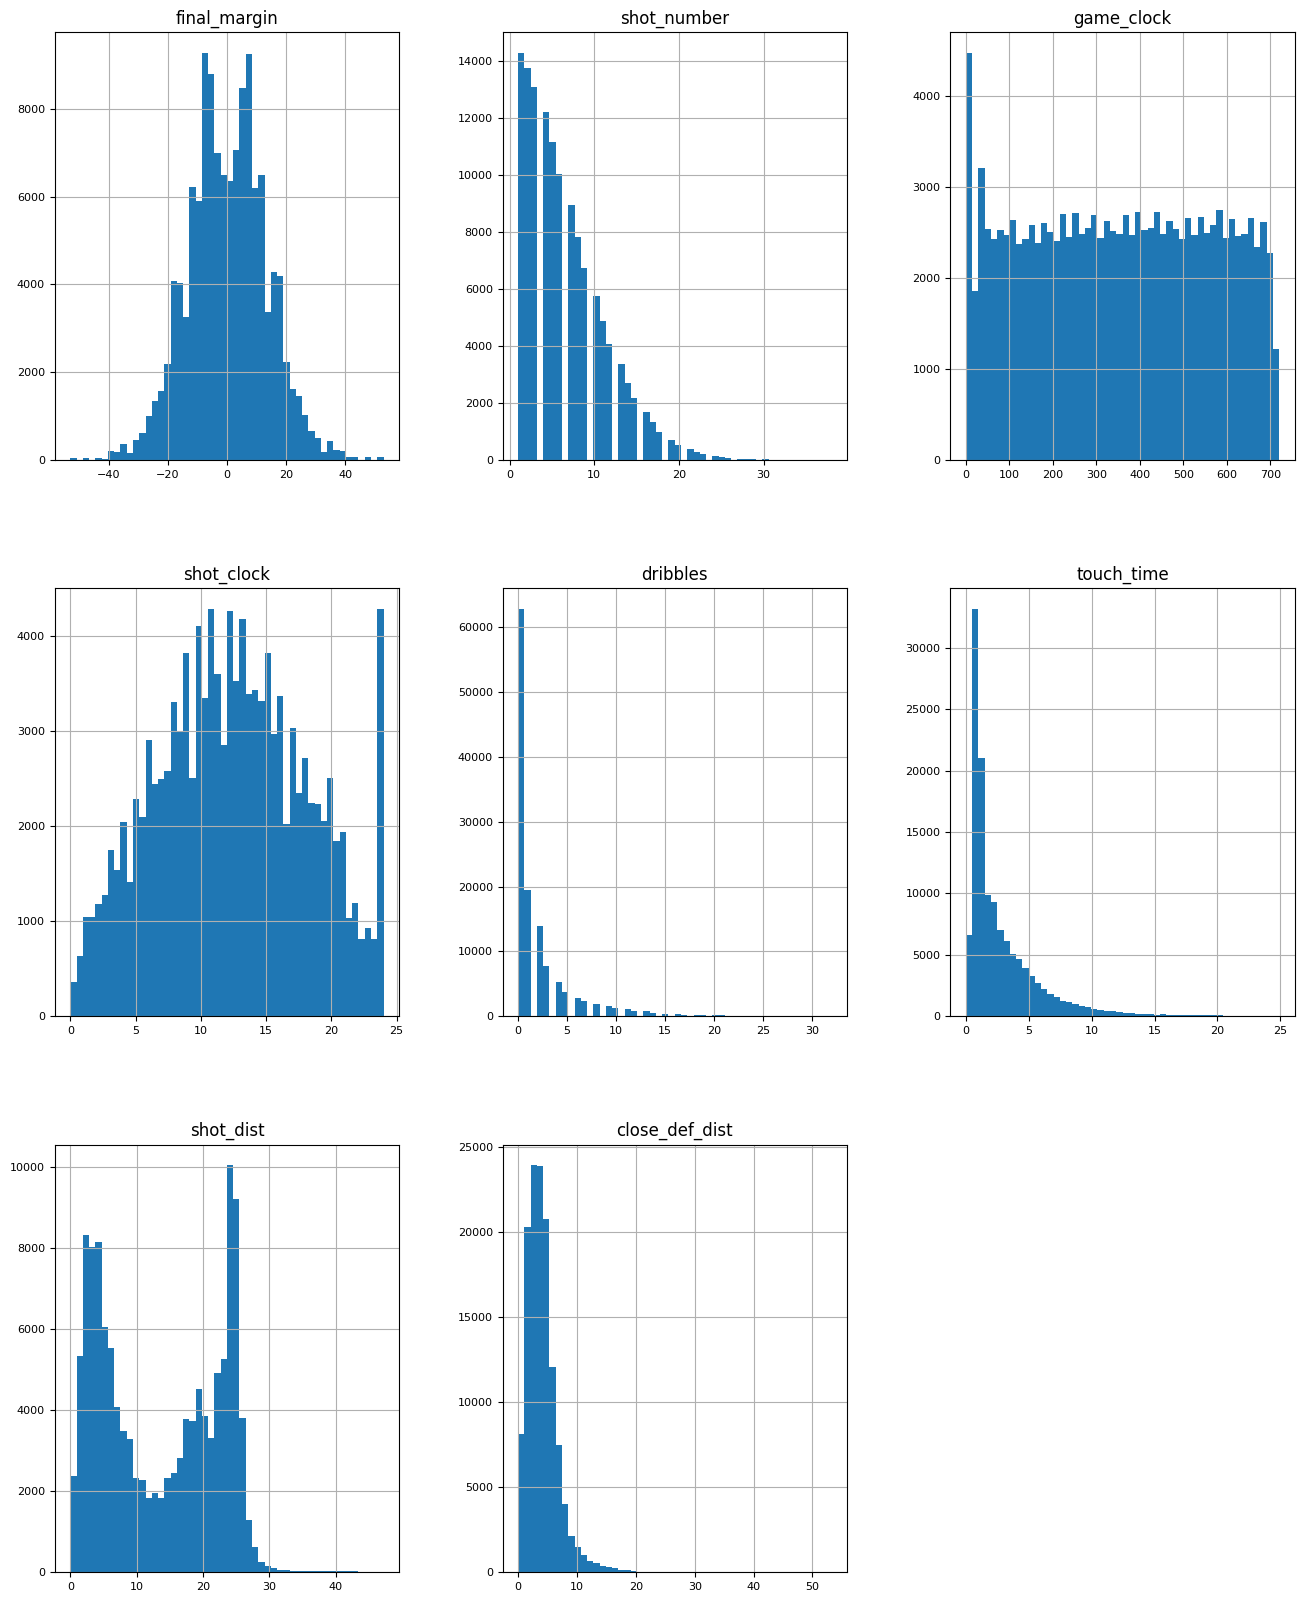

In [22]:
df_con.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Count variables (like dribbles, shot_number) are highly right skewed. Features like close_def_dist and touch_time are also right skewed (but are not count variables). 

Will have to do something about skewed data. Can apply box-cox transformation to distributions that do not contain 0 (like close_def_dist, shot_number, and touch time). Dribbles is the only one with a lot of 0s. (Could add constant value like 0.5 to each observation and then transform).


**Interesting feature**: slightly more shots taken when game_clock is closer to 0 (hail mary's)

### Adjusting skewness: 

(Virginia)

In [23]:
old_skew = df_con.skew().sort_values(ascending=False)
old_skew
#confirms the skewness of those 4 features

dribbles          2.777120
close_def_dist    2.479190
touch_time        2.399050
shot_number       1.138887
shot_dist         0.081037
shot_clock        0.071756
final_margin      0.016843
game_clock       -0.005960
dtype: float64

In [24]:
# df2b will be skew-adjusted dset
df2b = df2.copy()

In [25]:
from scipy import stats #for Box-Cox

### dribbles:
print('skewness of raw dribbles:', df2b['dribbles'].skew())

# log transformation
df2b['log_dribbles'] = np.log(df2b.dribbles+0.5)
print('skewness of log-tranformed dribbles:', df2b['log_dribbles'].skew())

# boxcox transformation 
df2b['cox_dribbles'], _ = stats.boxcox(df2b.dribbles+0.5)
print('skewness of cox-tranformed dribbles:', df2b['cox_dribbles'].skew())

print('\n', '=================================', '\n')

### close_def_dist
print('skewness of raw close_def_dist:', df2b['close_def_dist'].skew())

# log transformation
df2b['log_close_def_dist'] = np.log(df2b.close_def_dist+0.5)
print('skewness of log-tranformed close_def_dist:', df2b['log_close_def_dist'].skew())

# boxcox transformation
df2b['cox_close_def_dist'], _ = stats.boxcox(df2b.close_def_dist+0.5)
print('skewness of cox-tranformed close_def_dist:', df2b['cox_close_def_dist'].skew())

print('\n','=================================', '\n')

### touch_time
print('skewness of raw touch_time:', df2b['touch_time'].skew())

# log transformation
df2b['log_touch_time'] = np.log(df2b.touch_time+0.5)
print('skewness of log-tranformed touch_time:', df2b['log_touch_time'].skew())

# boxcox transformation
df2b['cox_touch_time'], _ = stats.boxcox(df2b.touch_time+0.5)
print('skewness of cox-tranformed touch_time:', df2b['cox_touch_time'].skew())

print('\n','=================================', '\n')

### shot_number
print('skewness of raw shot_number:', df2b['shot_number'].skew())

# log transformation
df2b['log_shot_number'] = np.log(df2b.shot_number+0.5)
print('skewness of log-tranformed shot_number:', df2b['log_shot_number'].skew())

# boxcox transformation
df2b['cox_shot_number'], _ = stats.boxcox(df2b.shot_number+0.5)
print('skewness of cox-tranformed shot_number:', df2b['cox_shot_number'].skew())

df2b.head(5)

skewness of raw dribbles: 2.777119650393458
skewness of log-tranformed dribbles: 0.6627391354599313
skewness of cox-tranformed dribbles: 0.26900748917728257


skewness of raw close_def_dist: 2.4791904173734816
skewness of log-tranformed close_def_dist: -0.5865318510812597
skewness of cox-tranformed close_def_dist: 0.03754678443842185


skewness of raw touch_time: 2.3990504499978655
skewness of log-tranformed touch_time: 0.4177412301213816
skewness of cox-tranformed touch_time: 0.02393201232593657


skewness of raw shot_number: 1.1388870086190162
skewness of log-tranformed shot_number: -0.2497821073645716
skewness of cox-tranformed shot_number: -0.03311189130948012


,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,...,player_name,player_id,log_dribbles,cox_dribbles,log_close_def_dist,cox_close_def_dist,log_touch_time,cox_touch_time,log_shot_number,cox_shot_number
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1,1,69,10.8,2,...,brian roberts,203148,0.916291,0.750047,0.587787,0.633374,0.875469,0.793966,0.405465,0.419786
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,2,1,14,3.4,0,...,brian roberts,203148,-0.693147,-0.814192,1.887070,2.413943,0.262364,0.254704,0.916291,0.991621
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,3,1,0,NaN,3,...,brian roberts,203148,1.252763,0.956203,0.336472,0.351094,1.163151,1.022264,1.252763,1.396375
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,4,2,707,10.3,2,...,brian roberts,203148,0.916291,0.750047,1.360977,1.622419,0.875469,0.793966,1.504077,1.714181
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,5,2,634,10.9,2,...,brian roberts,203148,0.916291,0.750047,0.470004,0.498859,1.163151,1.022264,1.704748,1.977890


array([[<AxesSubplot: title={'center': 'dribbles'}>,
        <AxesSubplot: title={'center': 'log_dribbles'}>,
        <AxesSubplot: title={'center': 'cox_dribbles'}>],
       [<AxesSubplot: title={'center': 'close_def_dist'}>,
        <AxesSubplot: title={'center': 'log_close_def_dist'}>,
        <AxesSubplot: title={'center': 'cox_close_def_dist'}>],
       [<AxesSubplot: title={'center': 'touch_time'}>,
        <AxesSubplot: title={'center': 'log_touch_time'}>,
        <AxesSubplot: title={'center': 'cox_touch_time'}>],
       [<AxesSubplot: title={'center': 'shot_number'}>,
        <AxesSubplot: title={'center': 'log_shot_number'}>,
        <AxesSubplot: title={'center': 'cox_shot_number'}>]], dtype=object)

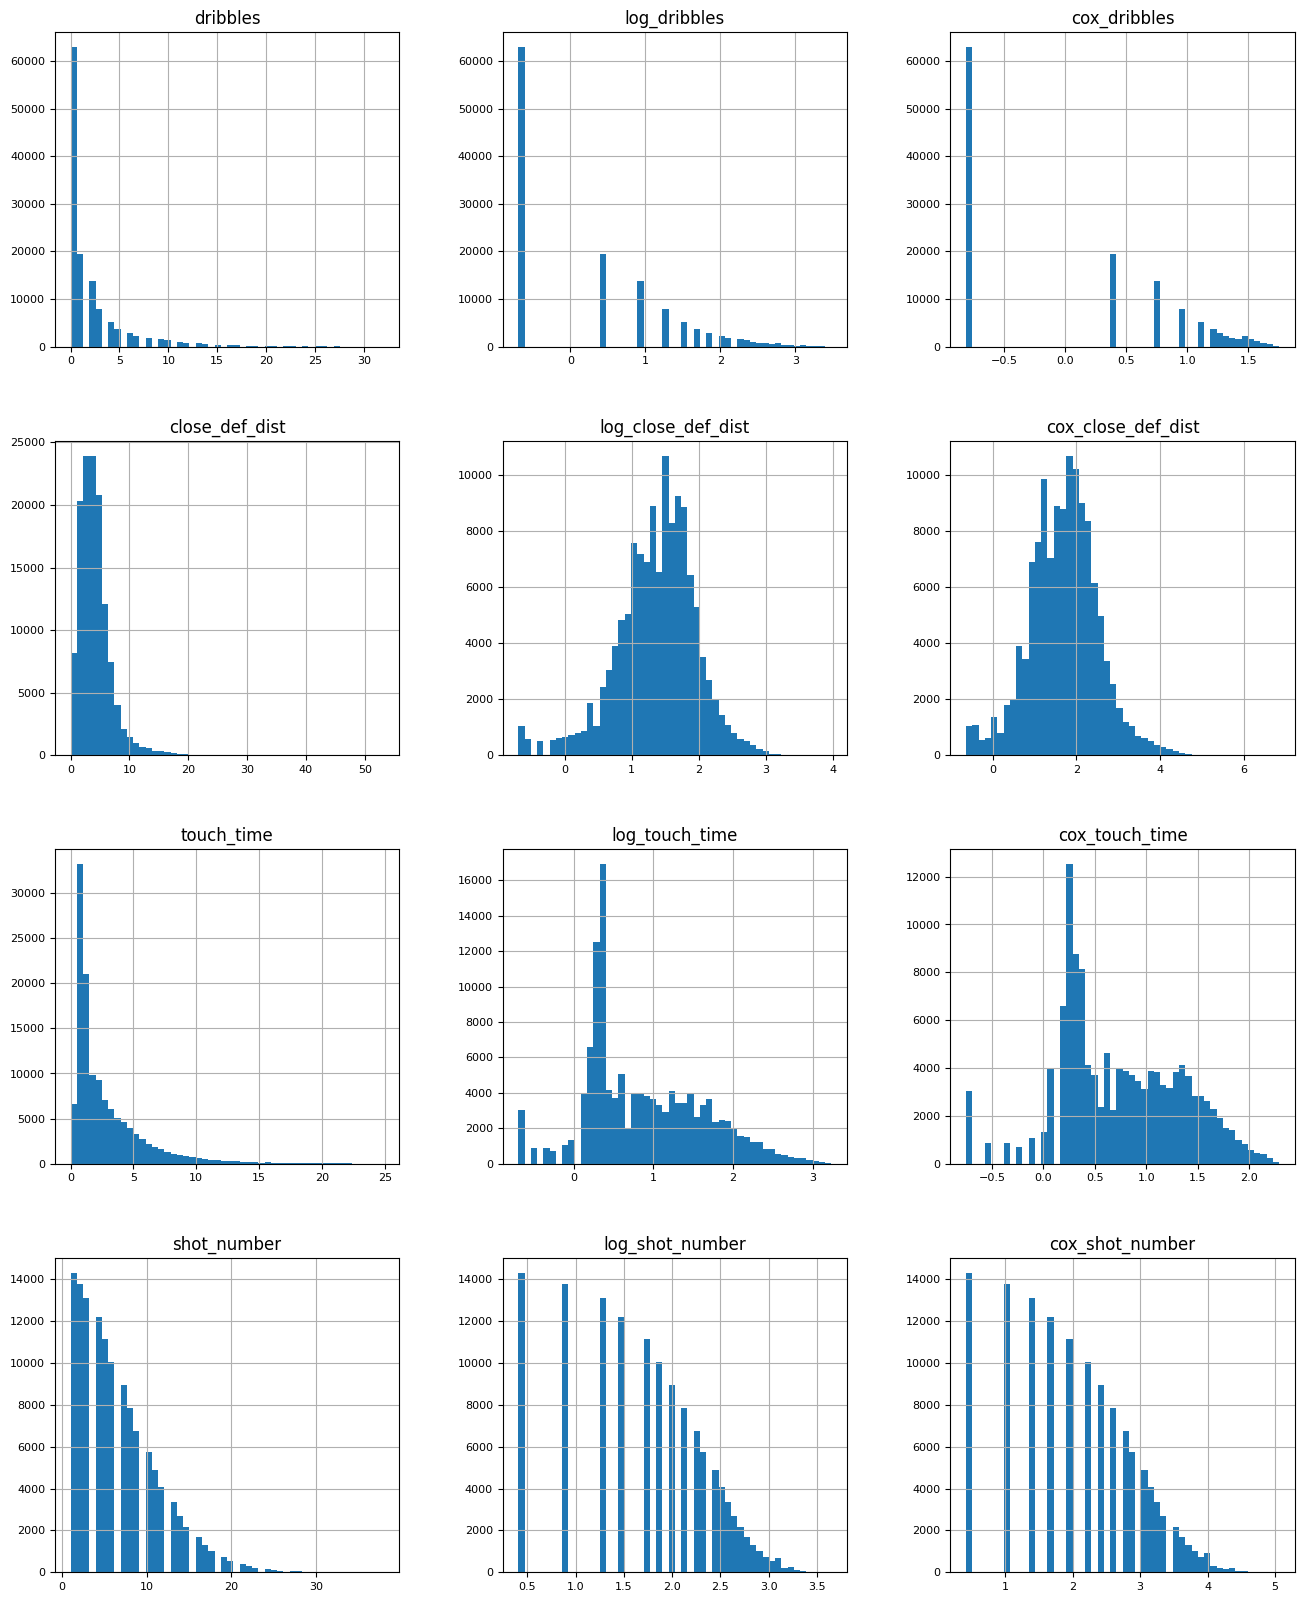

In [26]:
#Plot the histograms of newly transformed features

df2b_trans = df2b[['dribbles', 'log_dribbles', 'cox_dribbles',
                   'close_def_dist', 'log_close_def_dist', 'cox_close_def_dist', 
                   'touch_time', 'log_touch_time', 'cox_touch_time',
                   'shot_number', 'log_shot_number', 'cox_shot_number']]
df2b_trans.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Box-Cox gives the best skewness value for each feature, so I am leaning towards that one over log-transformation.

Plot categorical distributions (histograms):

In [27]:
df_cat = df2[['location', 'w', 'period', 'pts_type', 'shot_result', 'fgm', 'pts']]

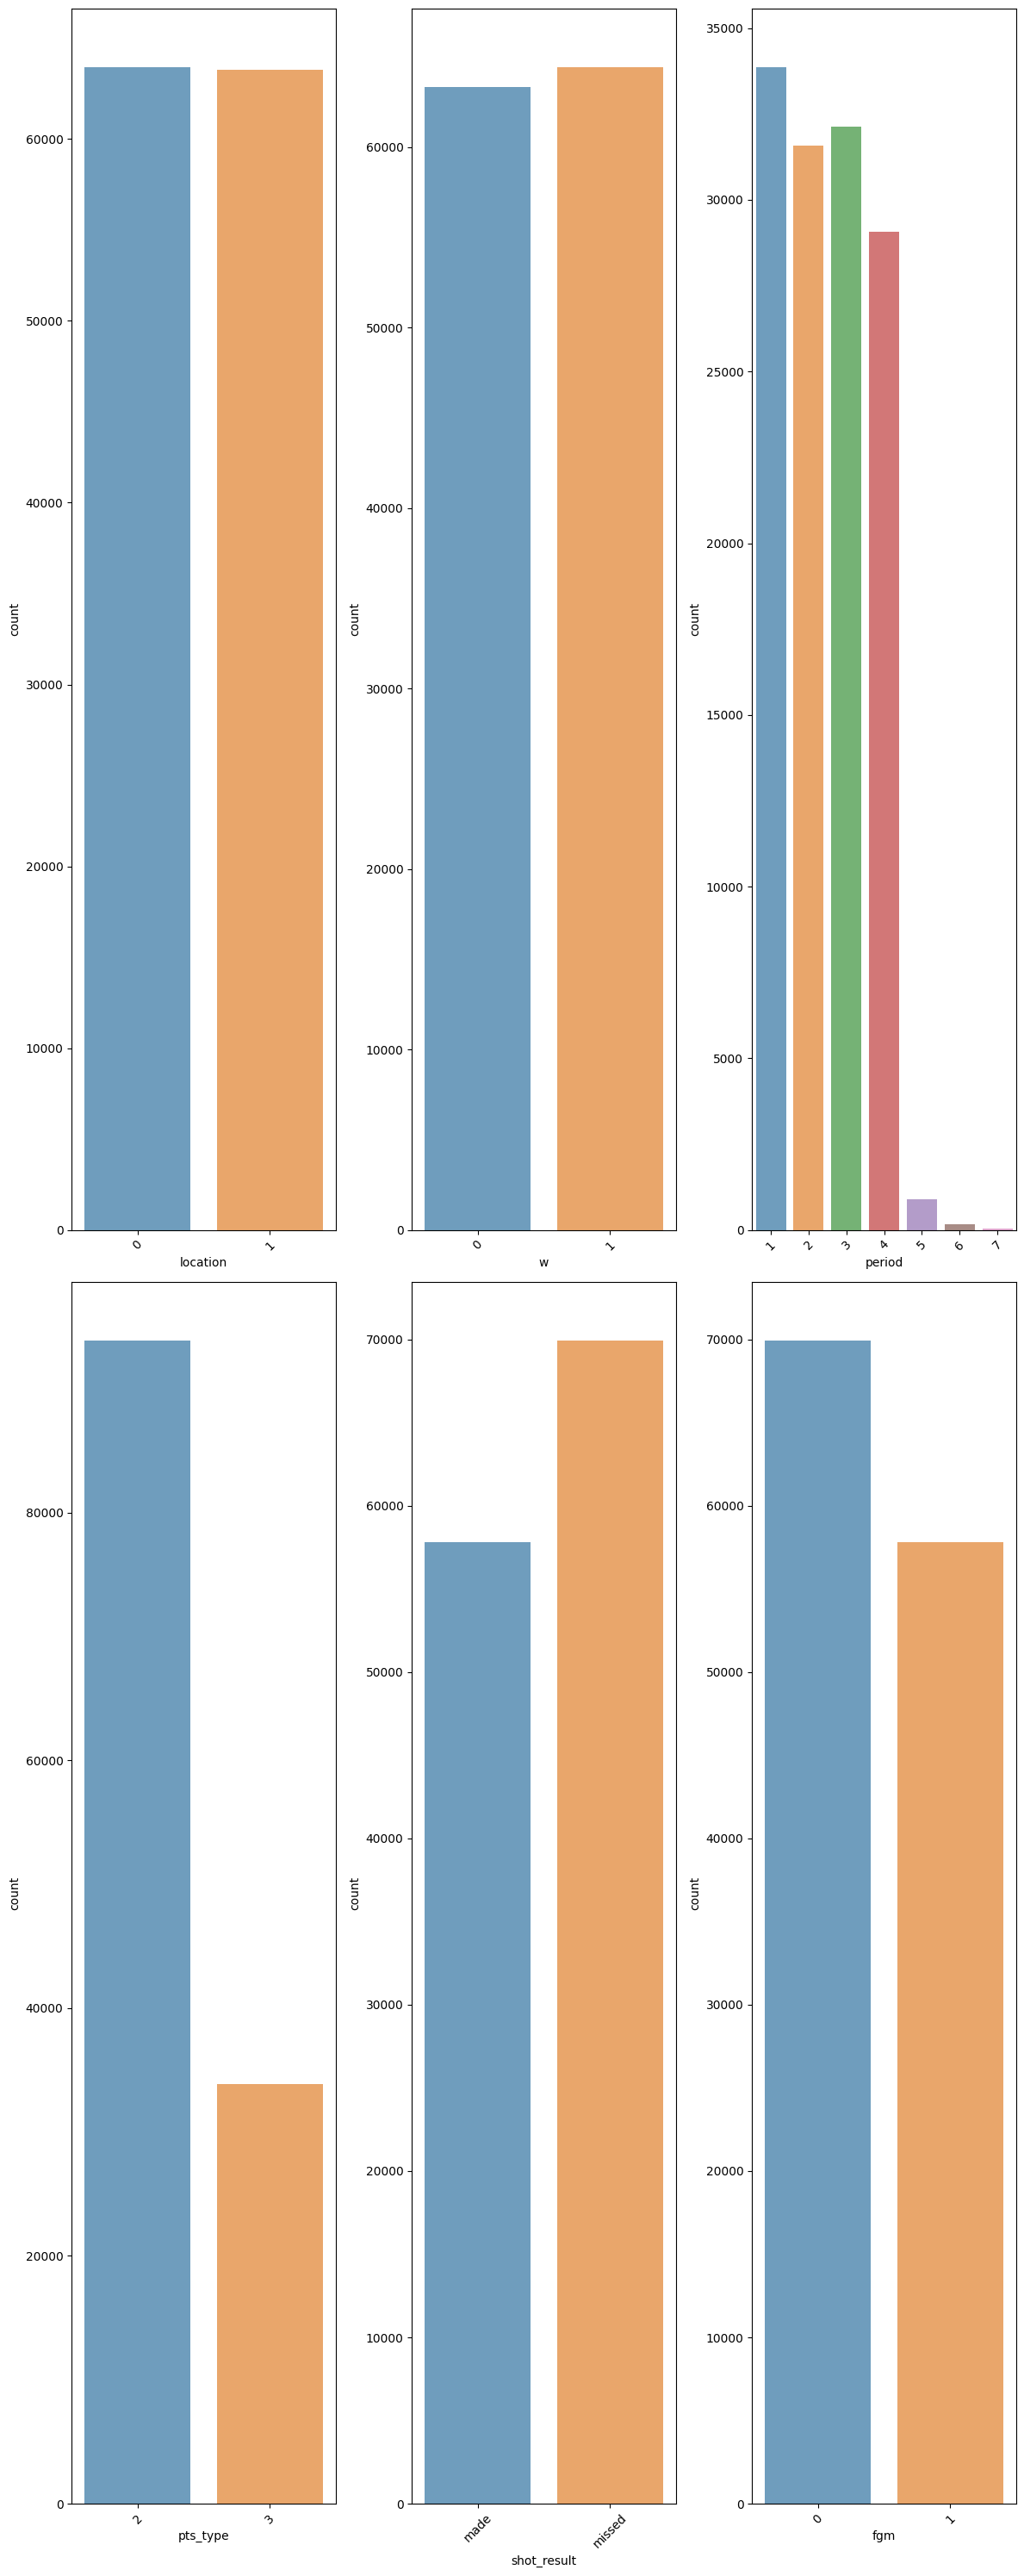

In [28]:
fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.tick_params(axis='x', rotation=45)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

The features we have not shown the distribution for yet are "unique values" or "unique keys." They have a different value for every instance of a feature. For example, they have a differeny unique value for each player, each defender, each game, and so on. 

It is not helpful to plot these distributions since the numerical values do not inherently mean anything/represent any mathematical relationship, they just reference a unique instance of a class. The distributions, generally, would just be random distributed with more labels than pandas can show. 

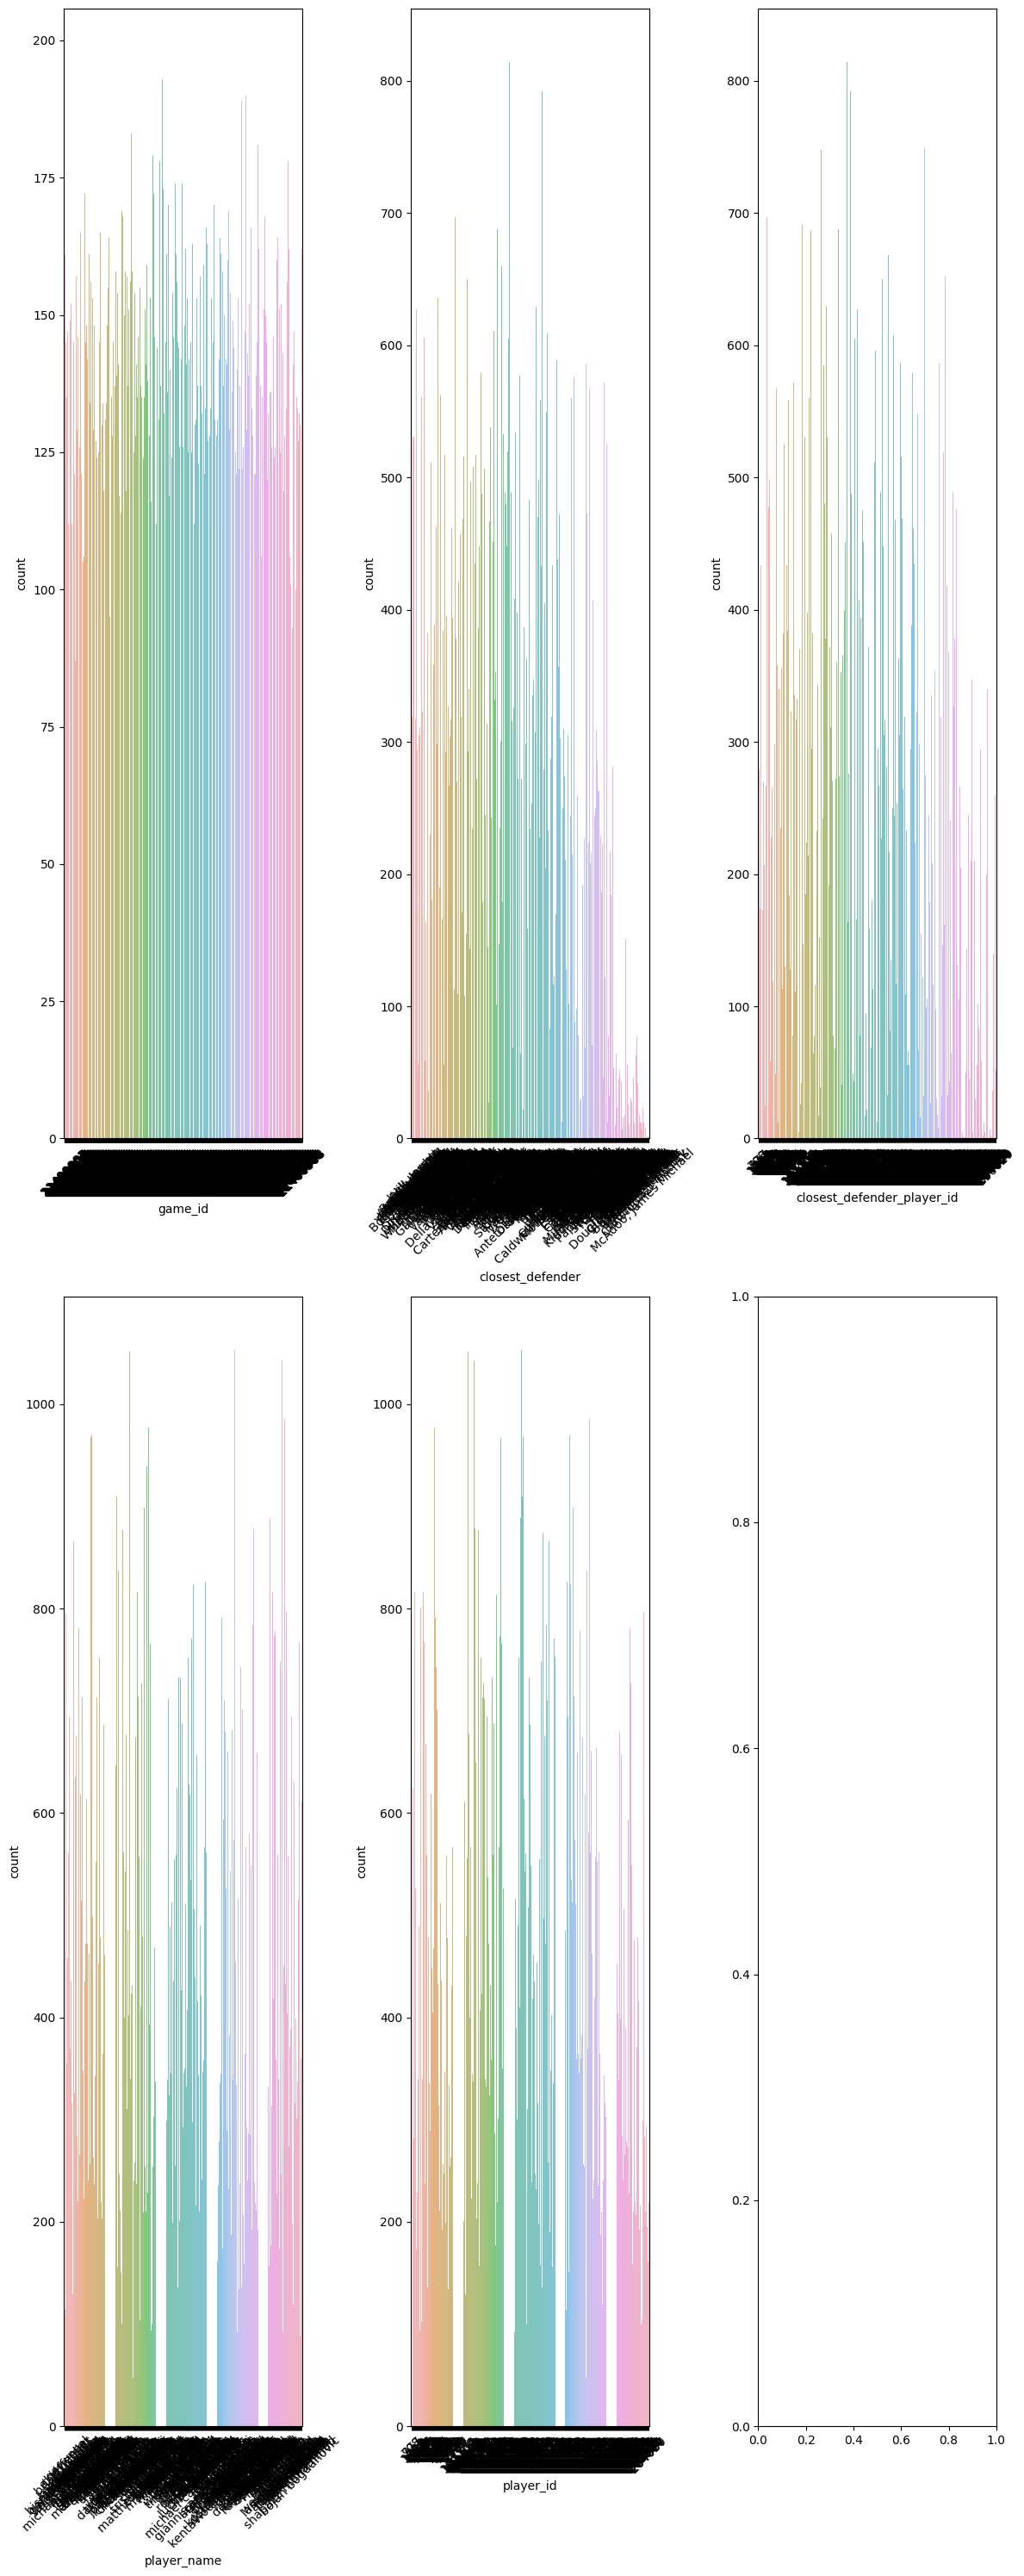

In [29]:
#see this: 
df_ran = df2[['game_id',  'closest_defender', 'closest_defender_player_id', 'player_name', 'player_id']]
fig, axes = plt.subplots(round(len(df_ran.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_ran.columns):
        ax.tick_params(axis='x', rotation=45)
        sns.countplot(x=df_ran.columns[i], alpha=0.7, data=df_ran, ax=ax)

fig.tight_layout()
#plotting their ditributions are not helpful (neither will their correlations be helpful)

### Correlations

(Virginia)
First, drop "shot_result" because it is equivalent to "fgm" and we only care about "fgm".

Also dropping 'pts' because it is directly correlated to 'fgm'. 

Dropping 'matchup' and 'game_id' because these are not relevant to the correlation problem at hand. 

In [30]:
#drop redundant features or features we know we will not use
df3 = df2.drop(labels = ['shot_result', 'matchup', 'game_id', 'pts', 'player_name', 
                         'closest_defender', 'fgm'], axis = 1)
df3['fgm'] = df2['fgm']

In [31]:
df3.head()

,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,player_id,fgm
0,0,1,24,1,1,69,10.8,2,1.9,7.7,2,101187,1.3,203148,1
1,0,1,24,2,1,14,3.4,0,0.8,28.2,3,202711,6.1,203148,0
2,0,1,24,3,1,0,NaN,3,2.7,10.1,2,202711,0.9,203148,0
3,0,1,24,4,2,707,10.3,2,1.9,17.2,2,203900,3.4,203148,0
4,0,1,24,5,2,634,10.9,2,2.7,3.7,2,201152,1.1,203148,0


### Test correlation of raw features (without adjusting for skewness):

In [32]:
df_corr = df3.corr()['fgm']
golden_features_list = abs(df_corr[abs(df_corr) > 0.01]).sort_values(ascending=False)
print("There is {} correlated values with fgm:\n{}".format(len(golden_features_list) -1, golden_features_list[1:(len(golden_features_list))]))

There is 9 correlated values with fgm:
shot_dist       0.192518
pts_type        0.121745
shot_clock      0.097482
final_margin    0.058861
w               0.050329
touch_time      0.048072
dribbles        0.034825
period          0.014091
game_clock      0.011591
Name: fgm, dtype: float64


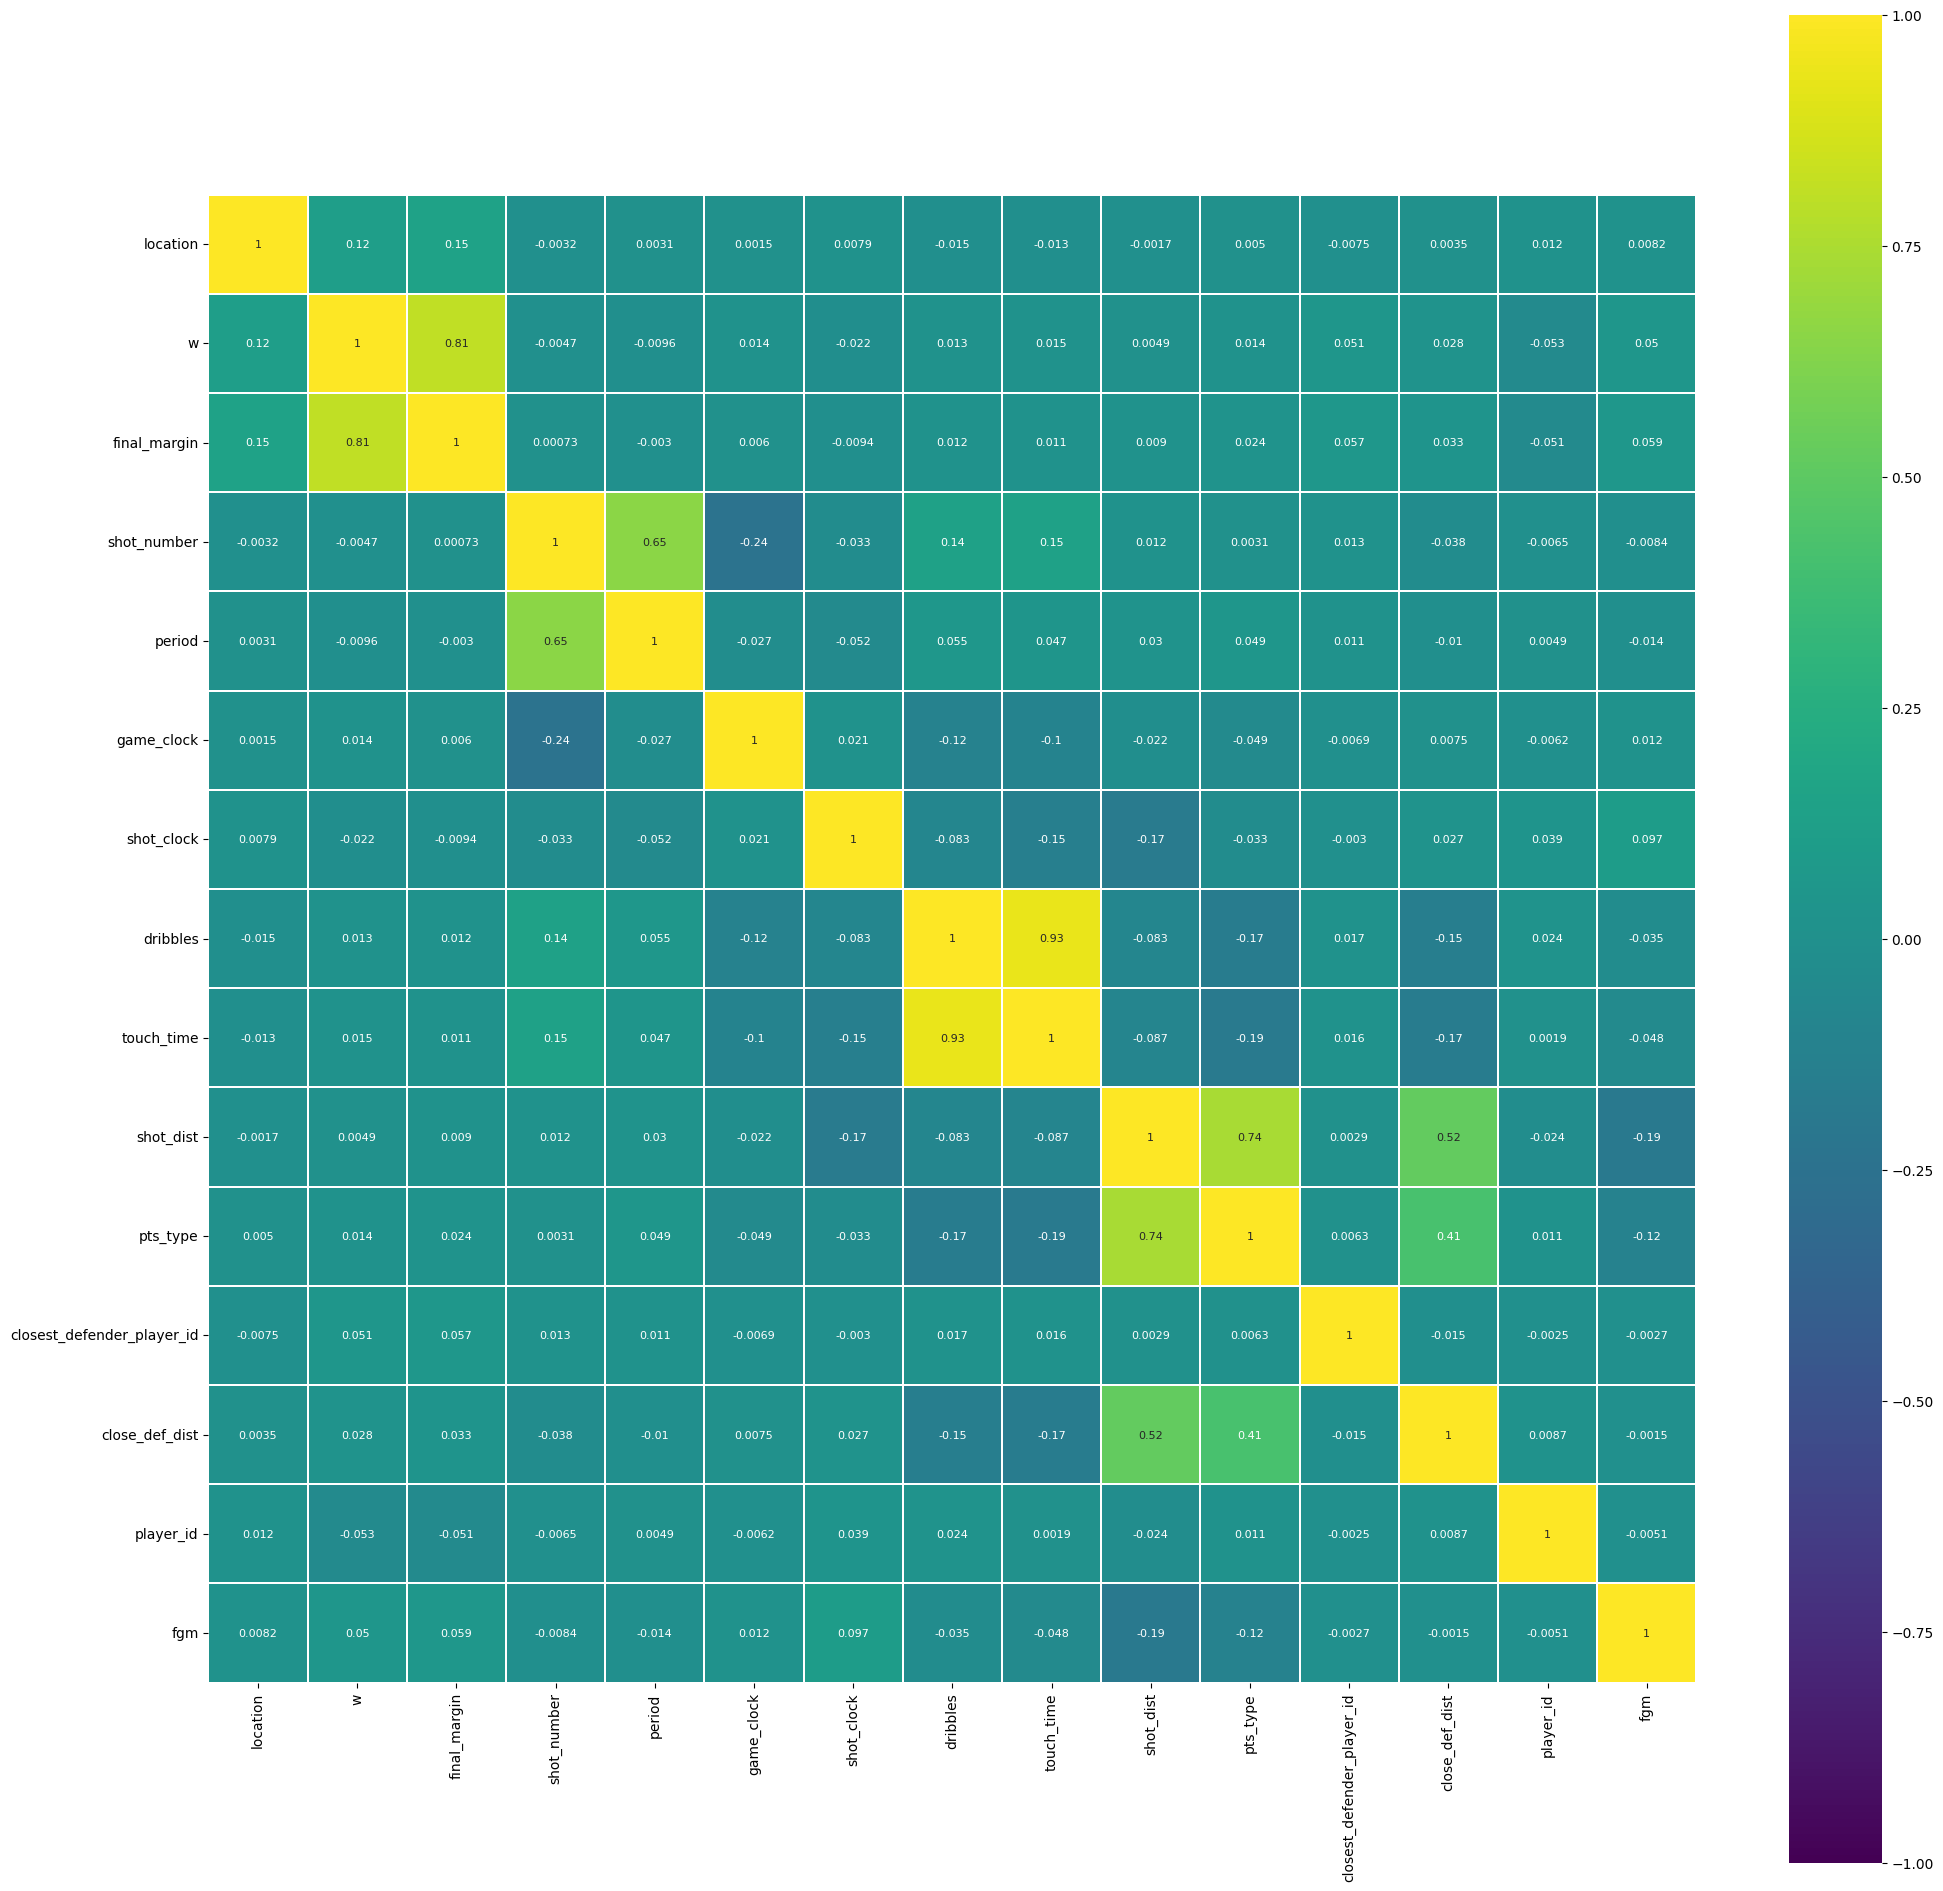

In [33]:
df_corr = df3.corr()
plt.figure(figsize=(24, 24))

sns.heatmap(df_corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### Test correlation of variables after skewness is adjusted:

(Virginia)

In [34]:
df3b = df2b.drop(labels = ['shot_result', 'matchup', 'game_id', 'pts', 'player_name',
                           'closest_defender', 'fgm'], axis = 1)
df3b['fgm'] = df2b['fgm']           

In [35]:
df_corr_b = df3b.corr()['fgm']
golden_features_list = abs(df_corr_b[abs(df_corr_b) > 0.01]).sort_values(ascending=False)
print("There is {} correlated values with fgm:\n{}".format(len(golden_features_list) -1, golden_features_list[1:(len(golden_features_list))]))

There is 13 correlated values with fgm:
shot_dist         0.192518
pts_type          0.121745
shot_clock        0.097482
cox_touch_time    0.062989
log_touch_time    0.061184
final_margin      0.058861
w                 0.050329
touch_time        0.048072
cox_dribbles      0.043376
log_dribbles      0.043020
dribbles          0.034825
period            0.014091
game_clock        0.011591
Name: fgm, dtype: float64


Shows that fixing skewness improves correlation! (Box-Cox is consistently the best transformation)

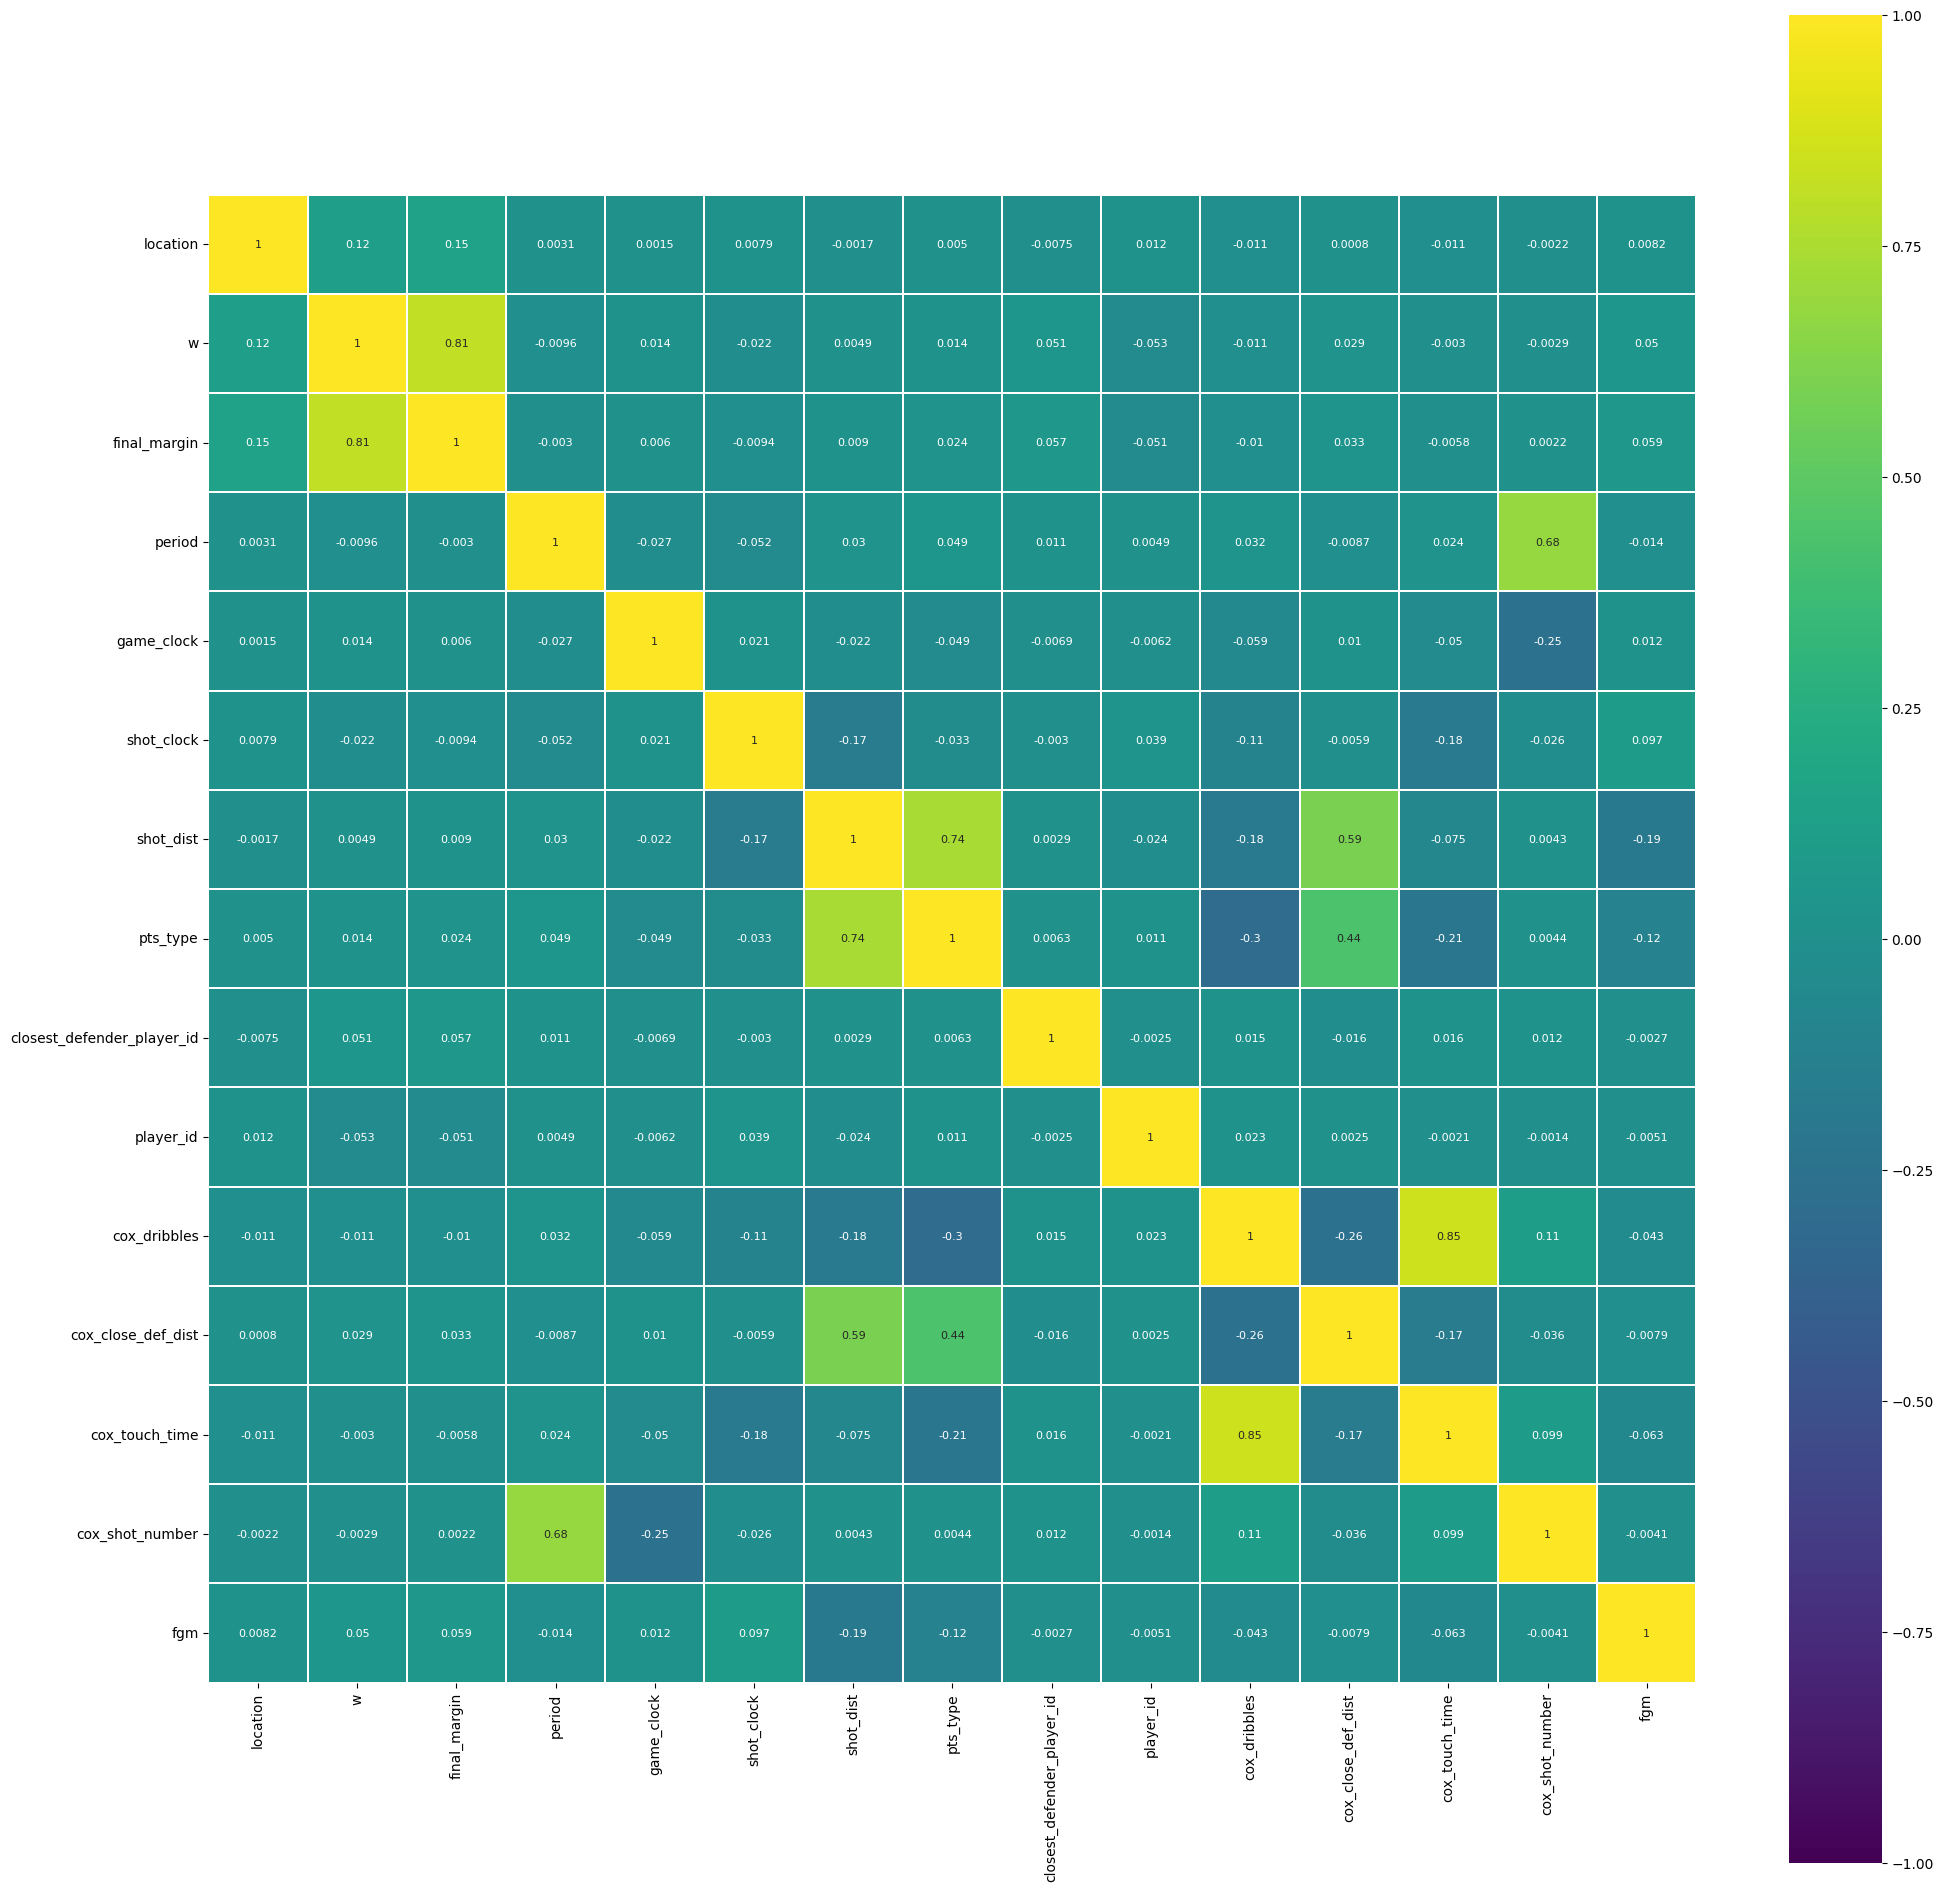

In [36]:
df3b = df2b.drop(labels = ['shot_result', 'matchup', 'game_id', 'pts', 'player_name',
                           'dribbles', 'log_dribbles', 'close_def_dist', 'log_close_def_dist',
                           'touch_time', 'log_touch_time', 'shot_number', 'log_shot_number',
                           'closest_defender', 'fgm'], axis = 1)

df3b['fgm'] = df2b['fgm']

df_corr_b = df3b.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(df_corr_b, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Adjusting for skewness does improve the correlation between these features and fgm!

## Fun relationships 
(Virginia)

when shot_clock = 24, shot_dist decreases? (rebounds) - Yes

when game clock nears 0, does shot_dist increase? (hail mary) - Yes

when dribbles = 0, does shot accuracy increase? (i.e. the player is open) - No

In [37]:
df2.describe()
#baseline

,game_id,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,fgm,pts,player_id
count,1.277570e+05,127757.000000,127757.000000,127757.000000,127757.000000,127757.000000,127757.000000,122203.000000,127757.00000,127757.000000,127757.000000,127757.000000,127757.000000,127757.000000,127757.000000,127757.000000,127757.00000
mean,2.140045e+07,0.499284,0.504426,0.209789,6.506368,2.469595,351.409011,12.450301,2.02828,2.778727,13.576808,2.264964,159043.963399,4.124012,0.452468,0.998082,157229.09032
std,2.578955e+02,0.500001,0.499982,13.235094,4.713798,1.139929,207.602250,5.756509,3.48057,2.987196,8.887801,0.441316,78788.073182,2.756188,0.497738,1.131125,79369.28322
min,2.140000e+07,0.000000,0.000000,-53.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.00000
25%,2.140023e+07,0.000000,0.000000,-8.000000,3.000000,1.000000,172.000000,8.200000,0.00000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.00000
50%,2.140045e+07,0.000000,1.000000,1.000000,5.000000,2.000000,352.000000,12.300000,1.00000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.00000
75%,2.140067e+07,1.000000,1.000000,9.000000,9.000000,3.000000,531.000000,16.600000,2.00000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.00000
max,2.140091e+07,1.000000,1.000000,53.000000,38.000000,7.000000,720.000000,24.000000,32.00000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.00000


In [38]:
df2[df2['shot_clock'] == 24].describe()
#does it make sense that there are 3839 entries where people seemingly took shots when the shot clock was exactly 24 secs?
#those are shots after offensive rebounds
#so the shot clock just reset & they put the ball back up again
#expect a very high make % on those shots & a very low shot distance

#mean shot distance here- 3.5166 ft
#normally - 13.579 ft

,game_id,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,fgm,pts,player_id
count,3.818000e+03,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.0,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,2.140046e+07,0.501833,0.490571,0.123101,6.360922,2.509429,359.963070,24.0,0.171818,0.685961,3.524018,2.020691,155107.092195,2.755841,0.603981,1.213463,164619.253012
std,2.555815e+02,0.500062,0.499977,13.250159,4.419176,1.127706,191.227672,0.0,0.814990,1.191711,4.671980,0.142368,81712.383139,2.630404,0.489132,0.985489,75299.857812
min,2.140000e+07,0.000000,0.000000,-53.000000,1.000000,1.000000,24.000000,24.0,0.000000,0.000000,0.100000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140024e+07,0.000000,0.000000,-8.000000,3.000000,2.000000,198.000000,24.0,0.000000,0.000000,1.425000,2.000000,101141.000000,1.500000,0.000000,0.000000,201143.000000
50%,2.140046e+07,1.000000,0.000000,-1.000000,5.000000,3.000000,359.000000,24.0,0.000000,0.300000,2.300000,2.000000,201935.000000,2.200000,1.000000,2.000000,201980.000000
75%,2.140068e+07,1.000000,1.000000,9.000000,9.000000,3.000000,518.000000,24.0,0.000000,0.900000,3.500000,2.000000,203076.000000,3.200000,1.000000,2.000000,203081.000000
max,2.140091e+07,1.000000,1.000000,53.000000,35.000000,7.000000,720.000000,24.0,19.000000,16.700000,39.800000,3.000000,530027.000000,45.300000,1.000000,3.000000,204060.000000


Mean shot distance when shot clock = 24: 3.5240178103719226


/var/folders/l5/qtgwn0k57dz6xj57dwh8zwtc0000gn/T/ipykernel_7911/3603646367.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['shot_dist'], color='g', bins=100, hist_kws={'alpha': 0.4});


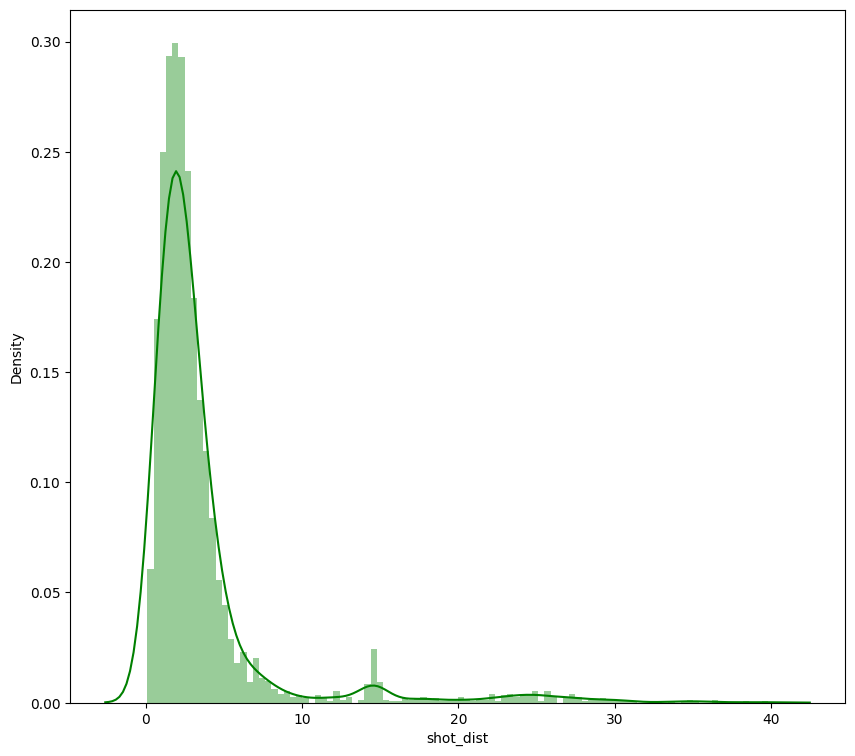

In [39]:
# Visualize this difference
temp = df2[df2['shot_clock']==24]
print('Mean shot distance when shot clock = 24:', temp['shot_dist'].mean())
plt.figure(figsize=(10, 9))

sns.distplot(temp['shot_dist'], color='g', bins=100, hist_kws={'alpha': 0.4});


Mean shot distance when shot clock < 24: 13.8864893213597


/var/folders/l5/qtgwn0k57dz6xj57dwh8zwtc0000gn/T/ipykernel_7911/896733928.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp2['shot_dist'], color='g', bins=100, hist_kws={'alpha': 0.4});


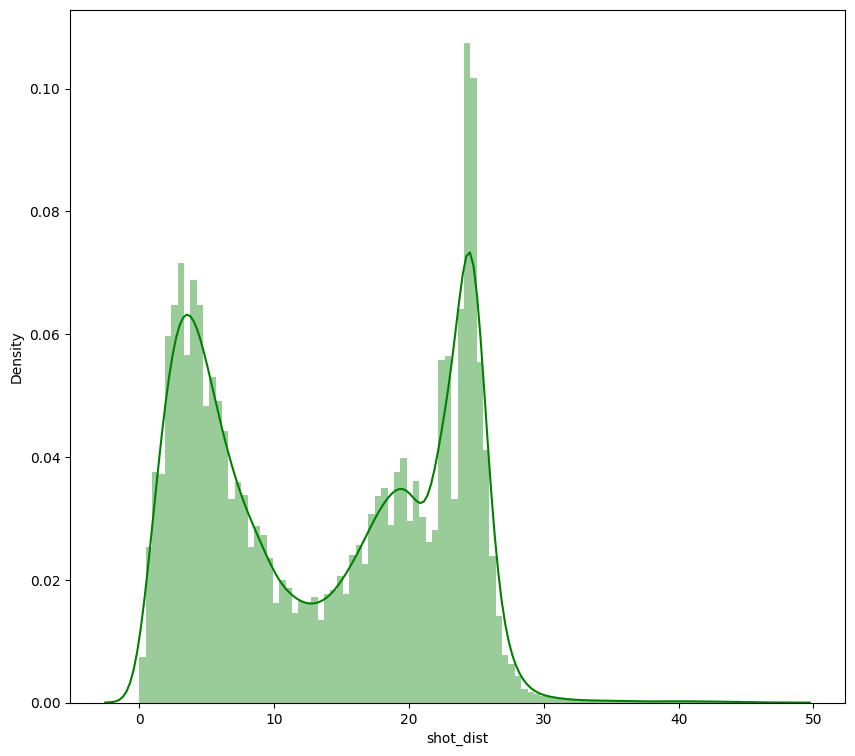

In [40]:
temp2 = df2[df2['shot_clock']!=24]
print('Mean shot distance when shot clock < 24:', temp2['shot_dist'].mean())
plt.figure(figsize=(10, 9))

sns.distplot(temp2['shot_dist'], color='g', bins=100, hist_kws={'alpha': 0.4});


In [41]:
df2[df2['game_clock'] < 5].describe()
#seem to be differences in shot accuracy and distance

,game_id,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,fgm,pts,player_id
count,2.656000e+03,2656.000000,2656.000000,2656.00000,2656.000000,2656.000000,2656.000000,148.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000
mean,2.140045e+07,0.490964,0.473268,0.15512,7.484563,2.321160,1.734187,1.716216,3.975527,4.102523,19.257605,2.503389,160879.476280,4.269352,0.279744,0.645708,156912.517696
std,2.562577e+02,0.500012,0.499379,12.65581,5.092566,1.084916,1.284169,1.075583,5.913418,5.118367,11.283573,0.500083,78877.221711,2.901390,0.448958,1.064689,78563.767944
min,2.140000e+07,0.000000,0.000000,-53.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,2.000000,708.000000,0.000000,0.000000,0.000000,977.000000
25%,2.140023e+07,0.000000,0.000000,-8.00000,4.000000,1.000000,1.000000,0.900000,0.000000,0.900000,8.100000,2.000000,200757.000000,2.400000,0.000000,0.000000,101150.000000
50%,2.140044e+07,0.000000,0.000000,-1.00000,6.000000,2.000000,1.000000,1.600000,1.000000,2.000000,22.200000,3.000000,201961.000000,3.700000,0.000000,0.000000,201941.000000
75%,2.140066e+07,1.000000,1.000000,8.00000,10.000000,3.000000,3.000000,2.325000,5.000000,4.700000,26.200000,3.000000,203084.000000,5.200000,1.000000,2.000000,202710.000000
max,2.140091e+07,1.000000,1.000000,48.00000,31.000000,7.000000,4.000000,4.400000,30.000000,24.400000,47.200000,3.000000,530027.000000,30.100000,1.000000,3.000000,204060.000000


Mean shot distance when game clock < 5: 19.257605421686748
Mean shot accuracy when game clock < 5: 0.27974397590361444


/var/folders/l5/qtgwn0k57dz6xj57dwh8zwtc0000gn/T/ipykernel_7911/2248803170.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['shot_dist'], color='g', bins=100, hist_kws={'alpha': 0.4});


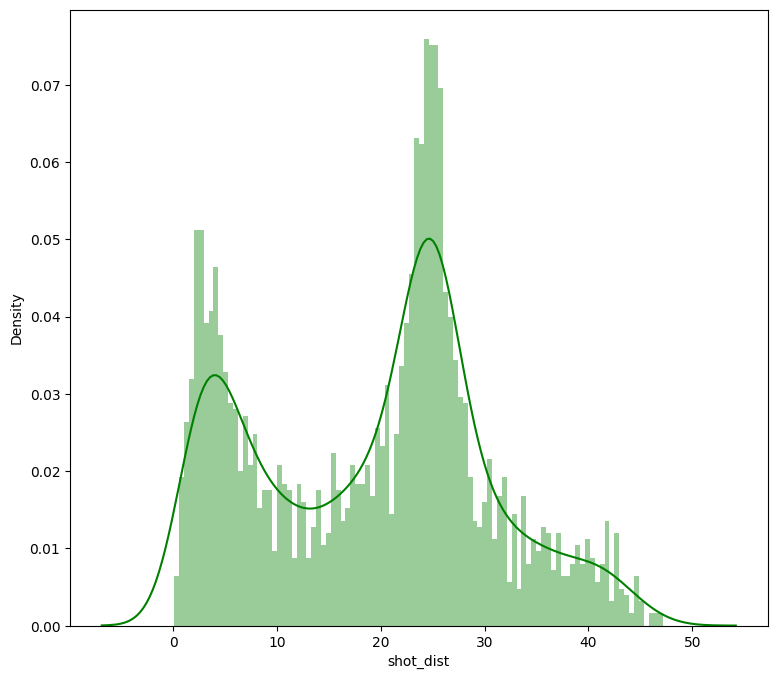

In [42]:
#Visualize difference
temp = df2[df2['game_clock'] < 5]
print('Mean shot distance when game clock < 5:', temp['shot_dist'].mean())
print('Mean shot accuracy when game clock < 5:', temp['fgm'].mean())


plt.figure(figsize=(9, 8))
sns.distplot(temp['shot_dist'], color='g', bins=100, hist_kws={'alpha': 0.4});


Mean shot distance when game clock >= 5: 13.456200190246282
Mean shot accuracy when game clock >= 5: 0.45613544256240957


/var/folders/l5/qtgwn0k57dz6xj57dwh8zwtc0000gn/T/ipykernel_7911/3841248345.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp2['shot_dist'], color='g', bins=100, hist_kws={'alpha': 0.4});


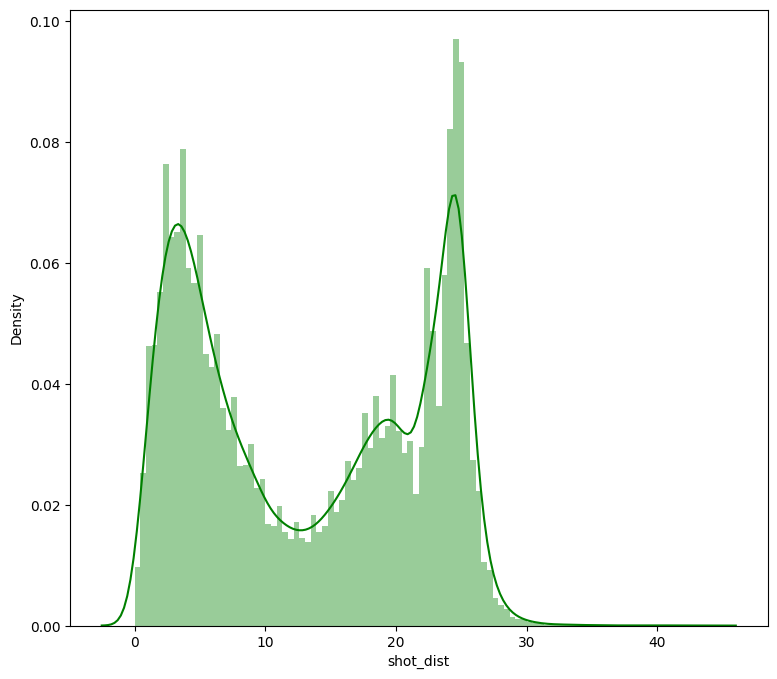

In [43]:
temp2 = df2[df2['game_clock'] >= 5]
print('Mean shot distance when game clock >= 5:', temp2['shot_dist'].mean())
print('Mean shot accuracy when game clock >= 5:', temp2['fgm'].mean())


plt.figure(figsize=(9, 8))
sns.distplot(temp2['shot_dist'], color='g', bins=100, hist_kws={'alpha': 0.4});


When there is less than 5 seconds left in the period/game: 

- Shots are less accurate (fgm goes from 0.45 to 0.28)

- Players shoot from farther distance (shot_dist goes from 13.58 to 19.26ft)

In [44]:
df2[df2['dribbles'] != 0].describe()

,game_id,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,fgm,pts,player_id
count,6.487300e+04,64873.000000,64873.000000,64873.000000,64873.000000,64873.000000,64873.000000,61823.000000,64873.000000,64873.000000,64873.000000,64873.000000,64873.000000,64873.00000,64873.000000,64873.000000,64873.000000
mean,2.140045e+07,0.495152,0.495599,-0.015014,6.937416,2.491422,344.508178,11.769330,3.994374,4.515188,11.794059,2.126632,160006.335810,3.38736,0.432984,0.905276,158407.181262
std,2.576154e+02,0.499980,0.499984,13.113311,4.985987,1.146646,208.999316,5.513398,4.000507,3.299701,7.895367,0.332563,78241.481376,2.20672,0.495492,1.053075,78132.667272
min,2.140000e+07,0.000000,0.000000,-53.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,708.000000,0.00000,0.000000,0.000000,708.000000
25%,2.140023e+07,0.000000,0.000000,-9.000000,3.000000,1.000000,163.000000,7.600000,1.000000,2.200000,5.000000,2.000000,200746.000000,2.00000,0.000000,0.000000,101179.000000
50%,2.140045e+07,0.000000,0.000000,-1.000000,6.000000,2.000000,342.000000,11.700000,2.000000,3.600000,9.500000,2.000000,201951.000000,3.10000,0.000000,0.000000,201939.000000
75%,2.140067e+07,1.000000,1.000000,9.000000,10.000000,3.000000,525.000000,16.000000,5.000000,5.700000,18.500000,2.000000,203079.000000,4.40000,1.000000,2.000000,202696.000000
max,2.140091e+07,1.000000,1.000000,53.000000,38.000000,7.000000,717.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,52.60000,1.000000,3.000000,204060.000000


In [45]:
df2[df2['dribbles'] == 0].describe()
#no real difference ... 

,game_id,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,pts_type,closest_defender_player_id,close_def_dist,fgm,pts,player_id
count,6.288400e+04,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,60380.000000,62884.0,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000
mean,2.140045e+07,0.503546,0.513533,0.441702,6.061685,2.447077,358.528115,13.147546,0.0,0.987342,15.415945,2.407671,158051.151469,4.883964,0.472569,1.093824,156013.736753
std,2.581844e+02,0.499991,0.499821,13.355706,4.371170,1.132527,205.910512,5.914583,0.0,0.759484,9.461292,0.491405,79336.397383,3.045086,0.499251,1.198866,80607.719128
min,2.140000e+07,0.000000,0.000000,-53.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,0.000000,0.000000,-8.000000,3.000000,1.000000,182.000000,8.900000,0.0,0.700000,4.200000,2.000000,101181.000000,2.800000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,1.000000,1.000000,5.000000,2.000000,362.000000,13.000000,0.0,0.900000,19.300000,2.000000,201945.000000,4.500000,0.000000,0.000000,201936.000000
75%,2.140067e+07,1.000000,1.000000,9.000000,8.000000,3.000000,536.000000,17.400000,0.0,1.100000,24.000000,3.000000,203078.000000,6.200000,1.000000,2.000000,202718.000000
max,2.140091e+07,1.000000,1.000000,53.000000,37.000000,7.000000,720.000000,24.000000,0.0,23.200000,46.300000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


Not much of interest exploring dribbles.

## Feature Engineering

(Harry)

Engineer features using domain knowledge of basketball. 

In [46]:
# fill circumstances where shot clock is off to game clock
df2.shot_clock.fillna(df2.game_clock, inplace = True)

# make column for seconds left in game
df2['full_game_clock'] = df2.game_clock + ((4 - df2.period) * 720)

# dummy variable for clutch shots
df2['clutch_shot'] = np.where((df2['final_margin'] >= -5) & (df2['final_margin'] <= 5) & (df2['full_game_clock'] <= 120), 1, 0)

# dummy variable for buzzer beaters
df2['buzzer_beater'] = np.where((df2['shot_clock'] < 1), 1, 0)

# add player shooting % column
df2['player_shooting'] = df2.groupby('player_id')['fgm'].transform(lambda x: x.sum()/x.count())

# add defense shooting % column
df2['defender_quality'] = df2.groupby('closest_defender_player_id')['fgm'].transform(lambda x: x.sum()/x.count())

# add dummy for assumed putback
df2['putback'] = np.where((df2['shot_clock'] > 23) & (df2['shot_dist'] < 5), 1, 0)

# add dummy for overtime
df2['overtime'] = np.where((df2['period'] > 4), 1, 0)

In [47]:
#Make sure these features are also in the skew-adjusted dset
# (will make a combined final dset at the end of EDA)
df2b['full_game_clock'] = df2['full_game_clock']
df2b['clutch_shot'] = df2['clutch_shot']
df2b['buzzer_beater'] = df2['buzzer_beater']
df2b['player_shooting'] = df2['player_shooting']
df2b['putback'] = df2['putback']
df2b['overtime'] = df2['overtime']
df2b['defender_quality'] = df2['defender_quality']
df2b.shot_clock.fillna(df2b.game_clock, inplace = True)
df2b.head()

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,...,cox_touch_time,log_shot_number,cox_shot_number,full_game_clock,clutch_shot,buzzer_beater,player_shooting,putback,overtime,defender_quality
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1,1,69,10.8,2,...,0.793966,0.405465,0.419786,2229,0,0,0.400538,0,0,0.452880
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,2,1,14,3.4,0,...,0.254704,0.916291,0.991621,2174,0,0,0.400538,0,0,0.407524
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,3,1,0,0.0,3,...,1.022264,1.252763,1.396375,2160,0,1,0.400538,0,0,0.407524
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,4,2,707,10.3,2,...,0.793966,1.504077,1.714181,2147,0,0,0.400538,0,0,0.460000
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,5,2,634,10.9,2,...,1.022264,1.704748,1.977890,2074,0,0,0.400538,0,0,0.482109


- **clutch shots** - final margin <= 5 pts, <120 secs left in game 

- **buzzer beaters** - dummy variable indicating whether there's <1 seconds left on shot clock 

- **putbacks** - dummy variable indicating if shot clock > 23 seconds and shot distance < 5ft (usually a rebound)

- **player_shooting** - % of shots made for that player in this season 

- **defender_quality** - % of shots made for shots defended by that player in this season 

- **overtime** - dummy variable indicating if game is in overtime or not

- **full_game_clock** - number of seconds left in game, accounting for game_clock and period (is negative for overtime)

<AxesSubplot: >

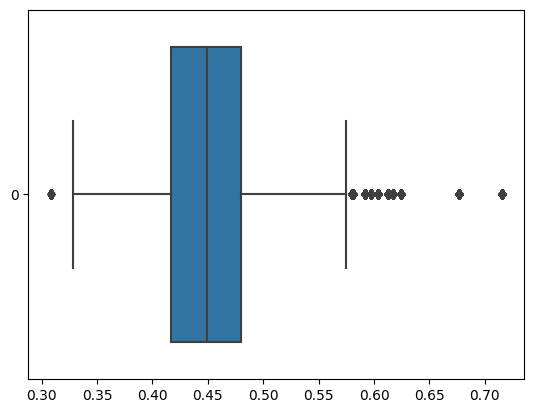

In [48]:
sns.boxplot(df2['player_shooting'], orient="h")
#looks good, continuous and well distributed

<AxesSubplot: >

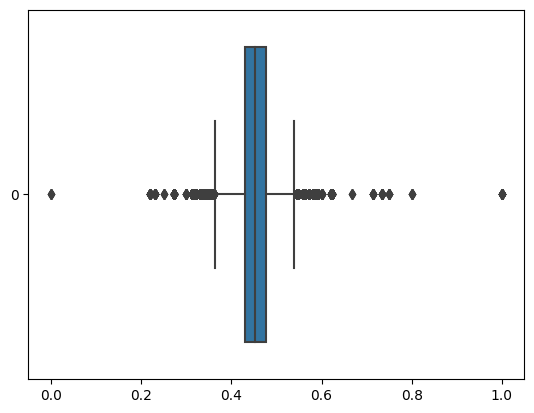

In [49]:
sns.boxplot(df2['defender_quality'], orient="h")

In [50]:
df2[df2['player_shooting'] ==df2['player_shooting'].max()].head(3)
#.710 shooting % from basketball-reference.com 
#killed it

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,...,pts,player_name,player_id,full_game_clock,clutch_shot,buzzer_beater,player_shooting,defender_quality,putback,overtime
109092,21400908,"MAR 04, 2015 - LAC vs. POR",1,0,-5,1,1,546,16.7,0,...,0,deandre jordan,201599,2706,0,0,0.715385,0.461656,0,0
109093,21400908,"MAR 04, 2015 - LAC vs. POR",1,0,-5,2,2,242,9.1,0,...,2,deandre jordan,201599,1682,0,0,0.715385,0.413462,0,0
109094,21400908,"MAR 04, 2015 - LAC vs. POR",1,0,-5,3,4,689,24.0,0,...,2,deandre jordan,201599,689,0,0,0.715385,0.461656,1,0


### Investigate Correlation with New Features (and Box-Cox adjusted skewness) 

(Virginia)

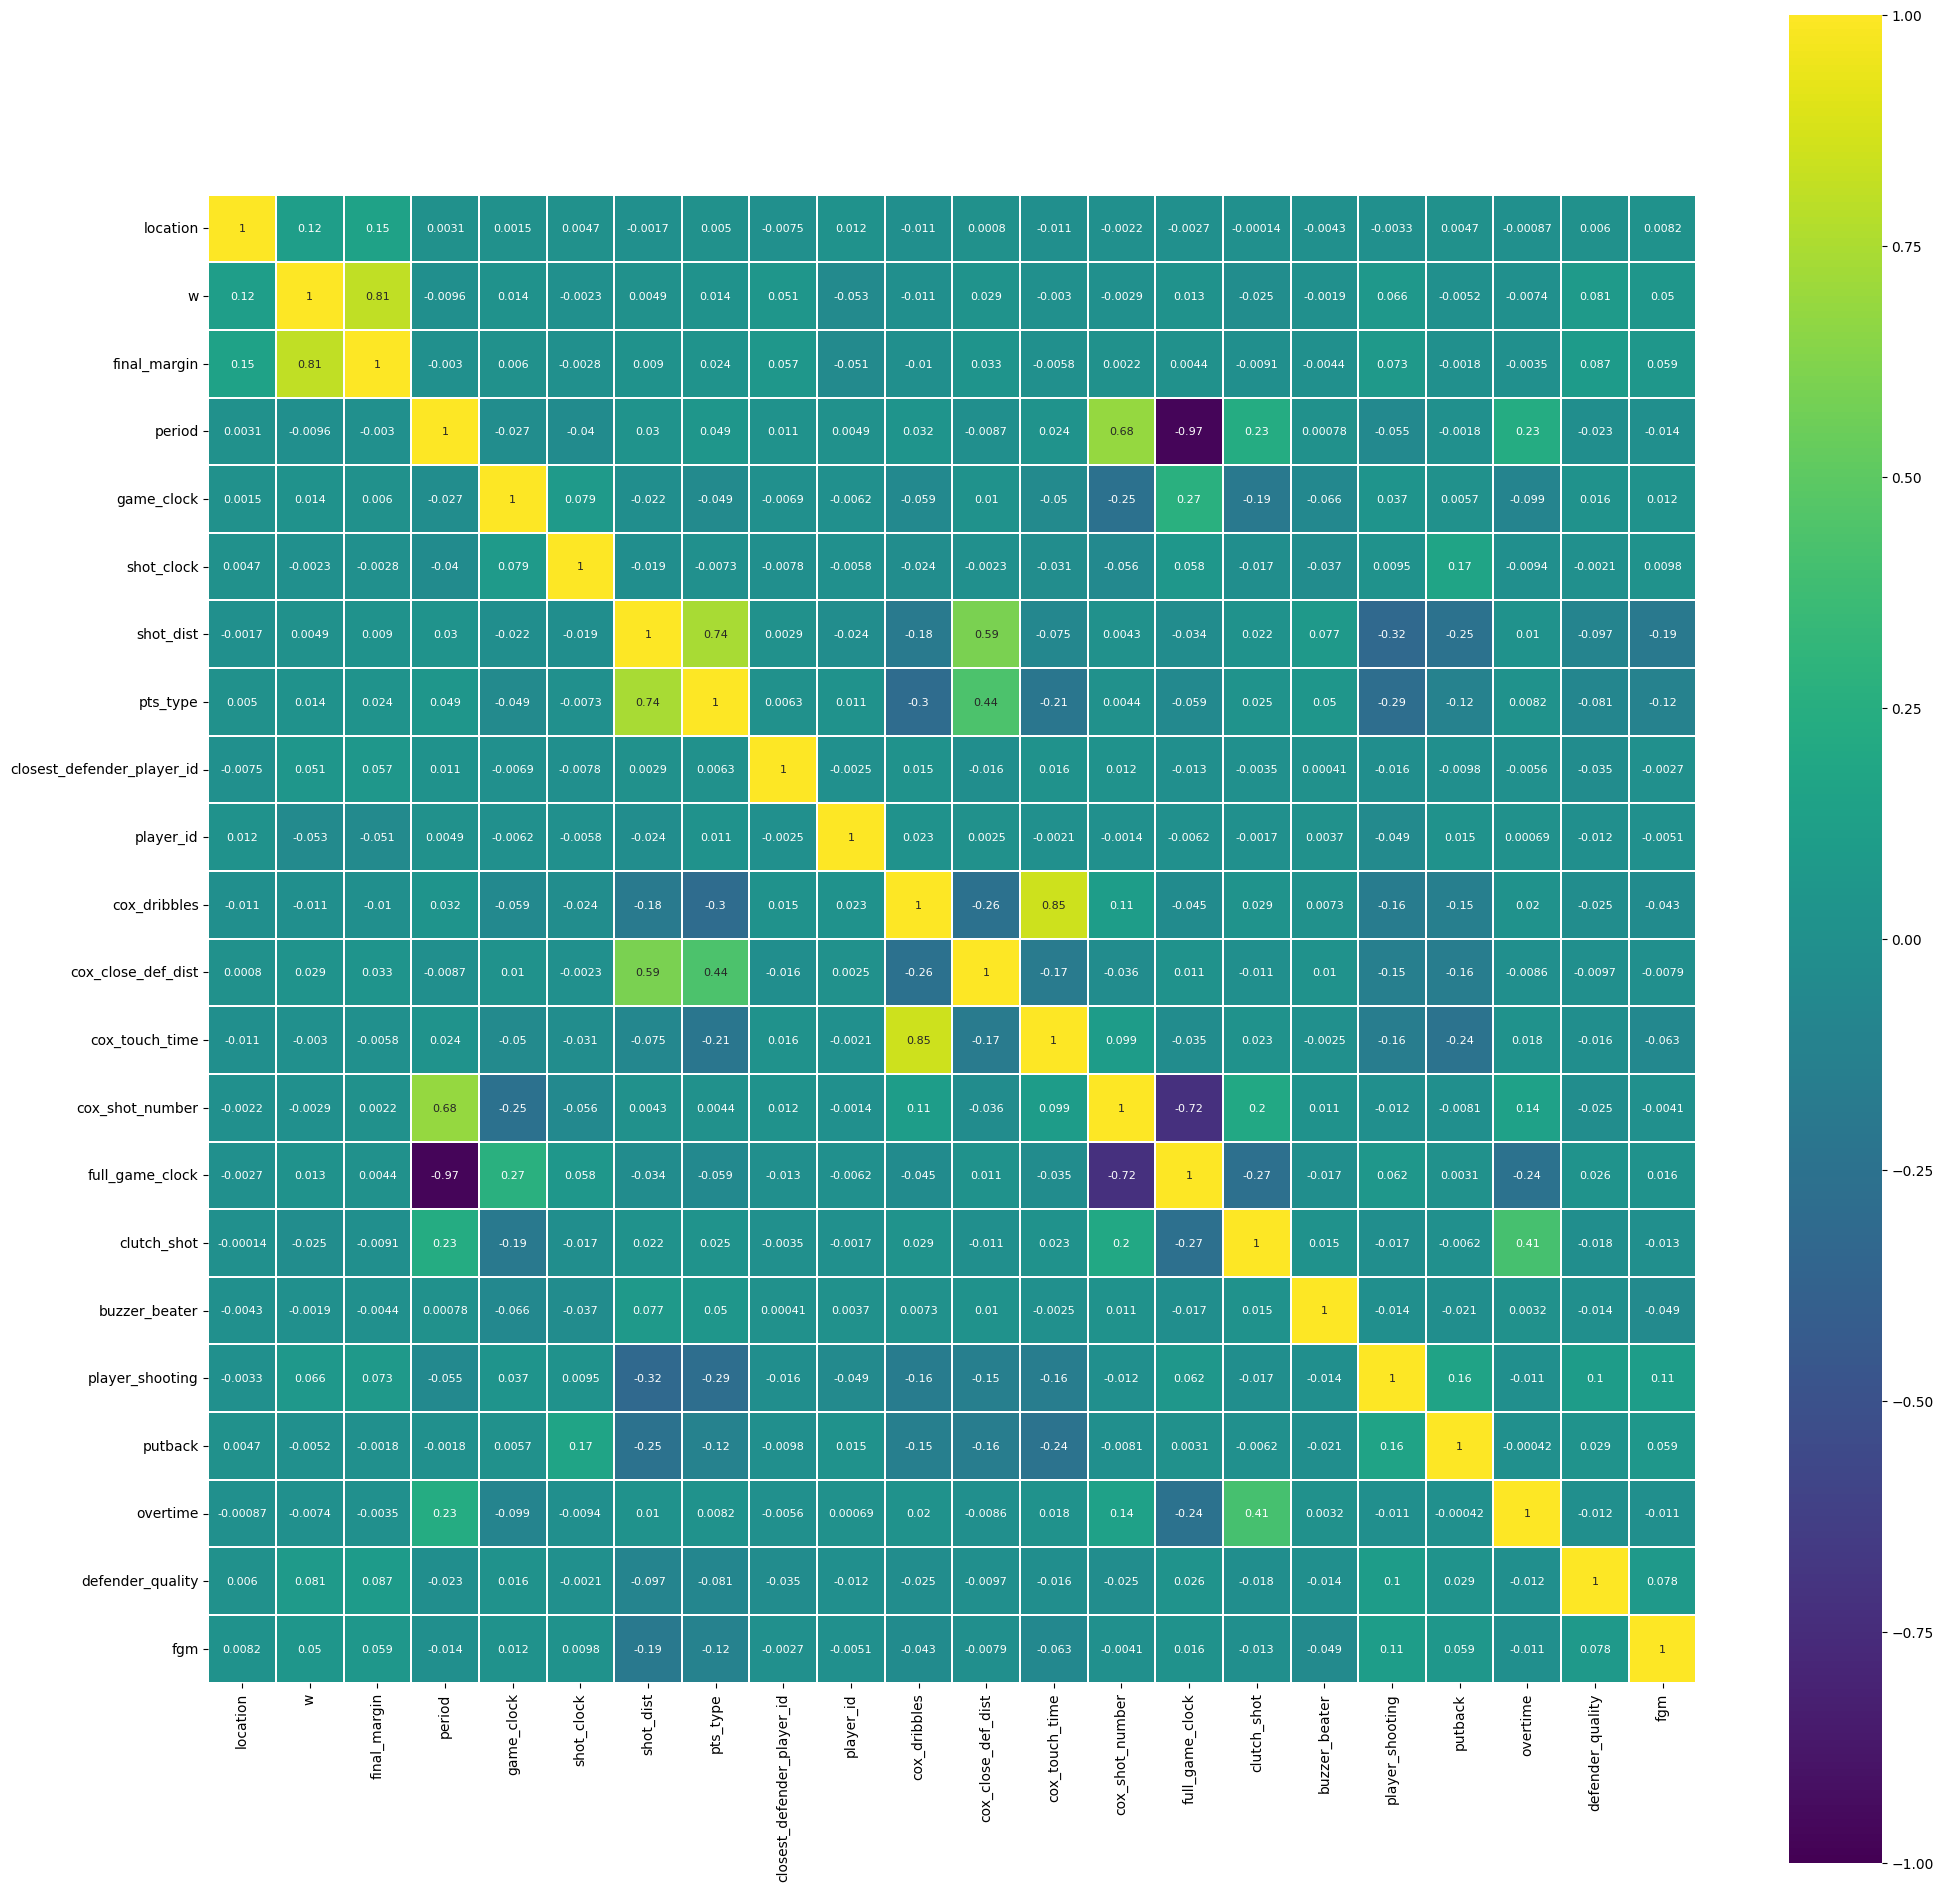

In [51]:
df4 = df2b.drop(labels = ['shot_result', 'matchup', 'game_id', 'pts', 'player_name', 'closest_defender',
                         'dribbles', 'log_dribbles', 'close_def_dist', 'log_close_def_dist','touch_time', 
                          'log_touch_time', 'shot_number', 'log_shot_number', 'fgm'], axis = 1)
df4['fgm'] = df2b['fgm']


df_corr = df4.corr()
plt.figure(figsize=(24, 24))

sns.heatmap(df_corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [52]:
df_corr = df4.corr()['fgm']
golden_features_list = abs(df_corr[abs(df_corr) > 0.01]).sort_values(ascending=False)
print("There is {} correlated values with fgm:\n{}".format(len(golden_features_list) -1, golden_features_list[1:(len(golden_features_list))]))

There is 15 correlated values with fgm:
shot_dist           0.192518
pts_type            0.121745
player_shooting     0.105316
defender_quality    0.077712
cox_touch_time      0.062989
final_margin        0.058861
putback             0.058657
w                   0.050329
buzzer_beater       0.048777
cox_dribbles        0.043376
full_game_clock     0.016397
period              0.014091
clutch_shot         0.012559
game_clock          0.011591
overtime            0.010588
Name: fgm, dtype: float64


Our engineered features have better correlations to fgm than most other features! Success. 

# Put it all together 

## Dataset to use from here on out (for modeling)
Has adjusted skewness, fixed anomalies, imputed na's, and added features 

In [53]:
df2b.columns

Index(['game_id', 'matchup', 'location', 'w', 'final_margin', 'shot_number',
       'period', 'game_clock', 'shot_clock', 'dribbles', 'touch_time',
       'shot_dist', 'pts_type', 'shot_result', 'closest_defender',
       'closest_defender_player_id', 'close_def_dist', 'fgm', 'pts',
       'player_name', 'player_id', 'log_dribbles', 'cox_dribbles',
       'log_close_def_dist', 'cox_close_def_dist', 'log_touch_time',
       'cox_touch_time', 'log_shot_number', 'cox_shot_number',
       'full_game_clock', 'clutch_shot', 'buzzer_beater', 'player_shooting',
       'putback', 'overtime', 'defender_quality'],
      dtype='object')

In [54]:
nba = df2b[['game_id', 'matchup', 'location', 'w', 'final_margin', 'cox_shot_number',
            'period', 'game_clock', 'shot_clock', 'full_game_clock', 'overtime', 'buzzer_beater', 
            'putback', 'clutch_shot', 'cox_dribbles', 'cox_touch_time', 'shot_dist', 'pts_type',  
            'closest_defender', 'closest_defender_player_id', 'defender_quality', 'cox_close_def_dist', 'player_name', 
            'player_id', 'player_shooting', 'fgm']]
nba.head()

,game_id,matchup,location,w,final_margin,cox_shot_number,period,game_clock,shot_clock,full_game_clock,...,shot_dist,pts_type,closest_defender,closest_defender_player_id,defender_quality,cox_close_def_dist,player_name,player_id,player_shooting,fgm
0,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,0.419786,1,69,10.8,2229,...,7.7,2,"Anderson, Alan",101187,0.452880,0.633374,brian roberts,203148,0.400538,1
1,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,0.991621,1,14,3.4,2174,...,28.2,3,"Bogdanovic, Bojan",202711,0.407524,2.413943,brian roberts,203148,0.400538,0
2,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1.396375,1,0,0.0,2160,...,10.1,2,"Bogdanovic, Bojan",202711,0.407524,0.351094,brian roberts,203148,0.400538,0
3,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1.714181,2,707,10.3,2147,...,17.2,2,"Brown, Markel",203900,0.460000,1.622419,brian roberts,203148,0.400538,0
4,21400899,"MAR 04, 2015 - CHA @ BKN",0,1,24,1.977890,2,634,10.9,2074,...,3.7,2,"Young, Thaddeus",201152,0.482109,0.498859,brian roberts,203148,0.400538,0


### Feature Selection

(Harry)

The first method we use is to select features via intuition and domain knowledge. We also look at a sorted list of the highest correlated features. This leads us to remove features such as player and defender ID in favor of player_shooting and defender_quality. 

In addition, we use sequential backward selection (SBS) to select the strongest set of 12 features from the dataset with 26 columns. We then compare the columns selected. 

In [55]:
nba_corr = nba.corr()['fgm']
best_features = abs(nba_corr[abs(nba_corr) > 0.01]).sort_values(ascending=False)
best_features

/var/folders/l5/qtgwn0k57dz6xj57dwh8zwtc0000gn/T/ipykernel_7911/1662435323.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nba_corr = nba.corr()['fgm']


fgm                 1.000000
shot_dist           0.192518
pts_type            0.121745
player_shooting     0.105316
defender_quality    0.077712
cox_touch_time      0.062989
final_margin        0.058861
putback             0.058657
w                   0.050329
buzzer_beater       0.048777
cox_dribbles        0.043376
full_game_clock     0.016397
period              0.014091
clutch_shot         0.012559
game_clock          0.011591
overtime            0.010588
Name: fgm, dtype: float64

In [56]:
nba_selected = nba[['location', 'w', 'final_margin', 'cox_shot_number',
            'period', 'game_clock', 'shot_clock', 'full_game_clock', 'overtime', 'buzzer_beater', 
            'putback', 'clutch_shot', 'cox_dribbles', 'cox_touch_time', 'shot_dist', 'pts_type',  
            'defender_quality', 'cox_close_def_dist', 'player_shooting', 'fgm']]

In [57]:
from sklearn.model_selection import train_test_split

X = nba.drop(labels = ['fgm', 'matchup', 'player_name', 'closest_defender'], axis = 1)
y = nba[['fgm']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #get training and testing data
y_train = np.squeeze(y_train)

from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train) #standardize X matrix so features don't get too unequal weight

In [58]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

features = SequentialFeatureSelector(LogisticRegression(), n_features_to_select = 12, direction="backward").fit(X_train, y_train)
#wrapper method
#SBS

#FOR FUTURE - drop game_id and closest_defended_player_id

features = features.get_support() # keep only the subset of 12 features that performed the best

In [59]:
X_trains = pd.DataFrame(X_train).loc[:,features]
X_tests = pd.DataFrame(X_test).loc[:,features]
print(X_trains.head())

cols = list(X.columns)

print("selected features: ")
for i in range(len(features)):
    if features[i]:
        print(cols[i])

         0         3         4         8         10        13        14  \
0  1.163910  1.195393 -0.341098 -0.290069 -0.107611  1.033358  0.945554   
1  0.364778 -0.771047 -1.096771  1.452025 -0.107611 -0.963427 -0.256913   
2  1.322961  0.212173 -0.065304  1.061373 -0.107611  0.372686  0.178672   
3  1.586752 -1.829900 -0.673468  0.443135 -0.107611  0.372686  0.178672   
4  0.667362 -0.771047  0.735420 -0.383919 -0.107611 -0.963427 -0.711869   

         15        16        17        18        19  
0 -0.178004 -0.601384 -1.985648 -0.936308 -0.317875  
1  0.890432 -0.601384  0.554951  0.278003  0.082611  
2 -0.324210 -0.601384  0.570112  1.796320  0.595513  
3  1.351546  1.662832  0.554812 -0.945749 -0.043247  
4  1.306559  1.662832  0.554863 -0.515237  0.162907  
selected features: 
game_id
final_margin
cox_shot_number
full_game_clock
buzzer_beater
cox_dribbles
cox_touch_time
shot_dist
pts_type
closest_defender_player_id
defender_quality
cox_close_def_dist


Correlation analysis: 


- shot_dist    

- pts_type  

- player_shooting ~  

- defender_quality 

- cox_touch_time  

- final_margin  

- putback ~    

- w ~         

- buzzer_beater  

- cox_dribbles  

- full_game_clock 

- period ~        

- clutch_shot ~   

- game_clock ~  

- overtime ~   



SBS picks: 


- game_id ?

- final_margin #

- cox_shot_number 

- full_game_clock #

- buzzer_beater #

- cox_dribbles #

- cox_touch_time #

- shot_dist #

- pts_type #

- closest_defender_player_id ?

- cox_close_def_dist

- defender_quality #


\# = in both sets

? = unique keys (interesting, needs further investigation) 

\~ = only in correlation

# In final_half: 

Model Building, Tuning Hyperparameters, Evaluation